In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns


In [3]:
#get jobzone df
jz = pd.read_excel('datasets/job_zone.xlsx')
jz.columns = jz.columns.str.lower().str.replace(" ","_")
jz = jz.drop(labels=['date', 'domain_source','o*net-soc_code'], axis=1)   
jz = jz.rename(columns={'job_zone':'zone'})
jz

,title,zone
0,Chief Executives,5
1,Chief Sustainability Officers,5
2,General and Operations Managers,4
3,Legislators,4
4,Advertising and Promotions Managers,4
...,...,...
918,Gas Compressor and Gas Pumping Station Operators,2
919,"Pump Operators, Except Wellhead Pumpers",2
920,Wellhead Pumpers,2
921,Refuse and Recyclable Material Collectors,2


In [4]:
# Set folder path
folder_name = "results/jm"

# Get all JSON files
json_files = [f for f in os.listdir(folder_name) if f.endswith('.json')]

#get the model name. stop at the second underscore
model_name = [json_files[:-5] for json_files in json_files]


In [18]:
model_name

['deepseek_benchmark',
 'deepseek_persona',
 'llama3.2_benchmark',
 'llama3.2_persona',
 'mistral_benchmark',
 'mistral_persona']

In [6]:
def mean_perfect_array(df):
    #get the mean difference in df, by iteration, into a np array
    return df.groupby("iteration")["perfect_match"].mean().to_numpy()

def mean_related_array(df):
    #get the mean difference in df, by iteration, into a np array
    return df.groupby("iteration")["related"].mean().to_numpy()

In [14]:
perfect_array_list = []
related_array_list = []

# Loop through each JSON file and load it into the DataFrame
for json_file in json_files:
    df = pd.read_json(f"{folder_name}/{json_file}").dropna()
    #drop the iteration column'
    df = df.drop(labels=['rating'], axis=1)
    #normalize related score to 0-1
    df['related'] = df['related']
    #get the mean difference in df, by iteration, into a np array
    perfect_array = mean_perfect_array(df)
    related_array = mean_related_array(df)
    perfect_array_list.append(perfect_array)
    related_array_list.append(related_array)

print(perfect_array_list)
print(related_array_list)

[array([0.13043478, 0.08695652, 0.15217391, 0.08695652, 0.06521739,
       0.13043478, 0.19565217, 0.13043478, 0.23913043, 0.13043478]), array([0.26086957, 0.2173913 , 0.23913043, 0.19565217, 0.2173913 ,
       0.26086957, 0.17391304, 0.2173913 , 0.17391304, 0.30434783]), array([0.17391304, 0.19565217, 0.2173913 , 0.15217391, 0.2173913 ,
       0.15217391, 0.2173913 , 0.13043478, 0.23913043, 0.2173913 ]), array([0.23913043, 0.19565217, 0.26086957, 0.2173913 , 0.2173913 ,
       0.2826087 , 0.2173913 , 0.26086957, 0.26086957, 0.2173913 ]), array([0.06521739, 0.06521739, 0.13043478, 0.10869565, 0.17391304,
       0.13043478, 0.10869565, 0.13043478, 0.10869565, 0.10869565]), array([0.13043478, 0.13043478, 0.19565217, 0.13043478, 0.15217391,
       0.15217391, 0.17391304, 0.13043478, 0.10869565, 0.10869565])]
[array([0.54347826, 0.67391304, 0.56521739, 0.47826087, 0.34782609,
       0.54347826, 0.63043478, 0.56521739, 1.        , 0.52173913]), array([1.56521739, 1.36956522, 1.34782609, 1.4

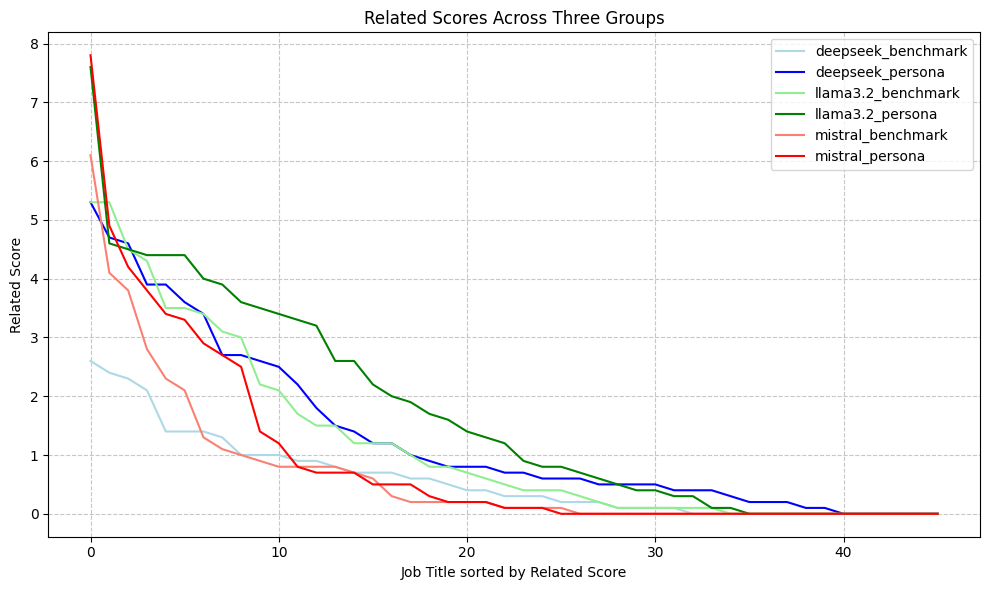

In [15]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
plt.figure(figsize=(10, 6))

# Colors for the three groups (each group has a light and dark shade)
colors = [
    ('lightblue', 'blue'),
    ('lightgreen', 'green'),
    ('salmon', 'red')
]

# Process 6 files (3 groups of 2)
for group_idx in range(3):
    # Calculate file indices for each group (0-1, 2-3, 4-5)
    file1_idx = group_idx * 2
    file2_idx = file1_idx + 1
    model1 = model_name[file1_idx]
    model2 = model_name[file2_idx]
    
    # Read and process first file of the group
    df1 = pd.read_json(os.path.join(folder_name, json_files[file1_idx]), lines=False).dropna()
    data1 = (df1.groupby("title")
            .agg({"perfect_match": "mean", "related": "mean"})
            .sort_values(by="related", ascending=False)
            .reset_index())
    data1['index'] = np.arange(len(data1))
    
    # Read and process second file of the group
    df2 = pd.read_json(os.path.join(folder_name, json_files[file2_idx]), lines=False).dropna()
    data2 = (df2.groupby("title")
            .agg({"perfect_match": "mean", "related": "mean"})
            .sort_values(by="related", ascending=False)
            .reset_index())
    data2['index'] = np.arange(len(data2))
    
    # Plot both lines with corresponding colors using lineplot
    sns.lineplot(data=data1, x='index', y="related", color=colors[group_idx][0], 
                label=model1)
    sns.lineplot(data=data2, x='index', y="related", color=colors[group_idx][1],
                label=model2)

# Add plot details
plt.title('Related Scores Across Three Groups')
plt.xlabel('Job Title sorted by Related Score')
plt.ylabel('Related Score')
#put the legend inside the plotm upper right corner
plt.legend(loc='upper right', fontsize=10, title_fontsize='13')
plt.grid(True, linestyle='--', alpha=0.7)  # Added grid for better readability
plt.tight_layout()

# Show plot
plt.show()

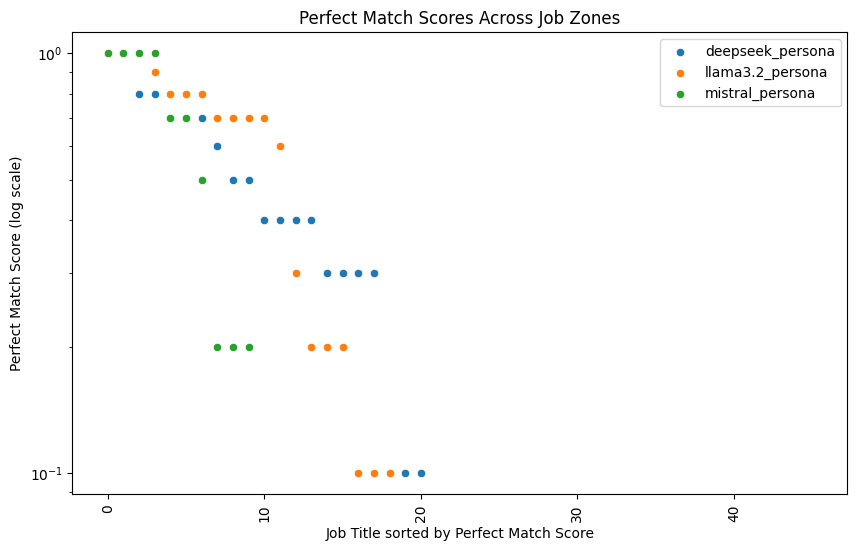

In [45]:
df1 = pd.read_json(os.path.join(folder_name, json_files[1]), lines=False).dropna()
df2 = pd.read_json(os.path.join(folder_name, json_files[3]), lines=False).dropna()
df3 = pd.read_json(os.path.join(folder_name, json_files[5]), lines=False).dropna()

df1 = df1.groupby("title").agg({"perfect_match": "mean", "related": "mean"}).reset_index()
df2 = df2.groupby("title").agg({"perfect_match": "mean", "related": "mean"}).reset_index()
df3 = df3.groupby("title").agg({"perfect_match": "mean", "related": "mean"}).reset_index()

df_merged = pd.concat([df1, df2], ignore_index=True)
df_merged = pd.concat([df_merged, df3], ignore_index=True)
#merge with jz
df_merged = df_merged.merge(jz, how='left', left_on='title', right_on='title')
df1.sort_values(by='perfect_match', ascending=False, inplace=True)
df2.sort_values(by='perfect_match', ascending=False, inplace=True)
df3.sort_values(by='perfect_match', ascending=False, inplace=True)
# Create a scatter plot with different colors for each zone


# df_merged['zone_color'] = df_merged['zone'].apply(lambda x: 'red' if x == 5 else ('blue' if x == 1 else 'lightgrey'))
df1['index'] = np.arange(len(df1))
df2['index'] = np.arange(len(df2))
df3['index'] = np.arange(len(df3))

#scatter plot in log scale for y axis
plt.figure(figsize=(10, 6))
plt.yscale('log')
plt.title('Perfect Match Scores Across Job Zones')
plt.xlabel('Job Title sorted by Perfect Match Score')
plt.ylabel('Perfect Match Score (log scale)')
plt.xticks(rotation=90)
sns.scatterplot(data=df1, x='index', y=df1["perfect_match"], label=model_name[1])
sns.scatterplot(data=df2, x='index', y=df2["perfect_match"], label=model_name[3])
sns.scatterplot(data=df3, x='index', y=df3["perfect_match"], label=model_name[5])
plt.legend()

In [17]:
df1 = pd.read_json(os.path.join(folder_name, json_files[1]), lines=False).dropna()
df2 = pd.read_json(os.path.join(folder_name, json_files[3]), lines=False).dropna()
df3 = pd.read_json(os.path.join(folder_name, json_files[5]), lines=False).dropna()

df1 = df1.groupby("title").agg({"perfect_match": "mean", "related": "mean"}).sort_values(by='related', ascending=False, inplace=True)
df2 = df2.groupby("title").agg({"perfect_match": "mean", "related": "mean"}).sort_values(by='related', ascending=False, inplace=True)
df3 = df3.groupby("title").agg({"perfect_match": "mean", "related": "mean"}).sort_values(by='related', ascending=False, inplace=True)

df_merged = pd.concat([df1, df2], ignore_index=True)
df_merged = pd.concat([df_merged, df3], ignore_index=True)
#merge with jz
df_merged = df_merged.merge(jz, how='left', left_on='title', right_on='title')
df_merged.sort_values(by='related', ascending=False, inplace=True)
# Create a scatter plot with different colors for each zone


df_merged['zone_color'] = df_merged['zone'].apply(lambda x: 'red' if x == 5 else ('blue' if x == 1 else 'lightgrey'))
df_merged['index'] = np.arange(len(df_merged))
sns.scatterplot(data=df_merged, x='index', y="related", hue='zone_color', 
        palette={'red': 'red', 'blue': 'blue', 'lightgrey': 'lightgrey'},
        legend=False
    )

ValueError: All objects passed were None

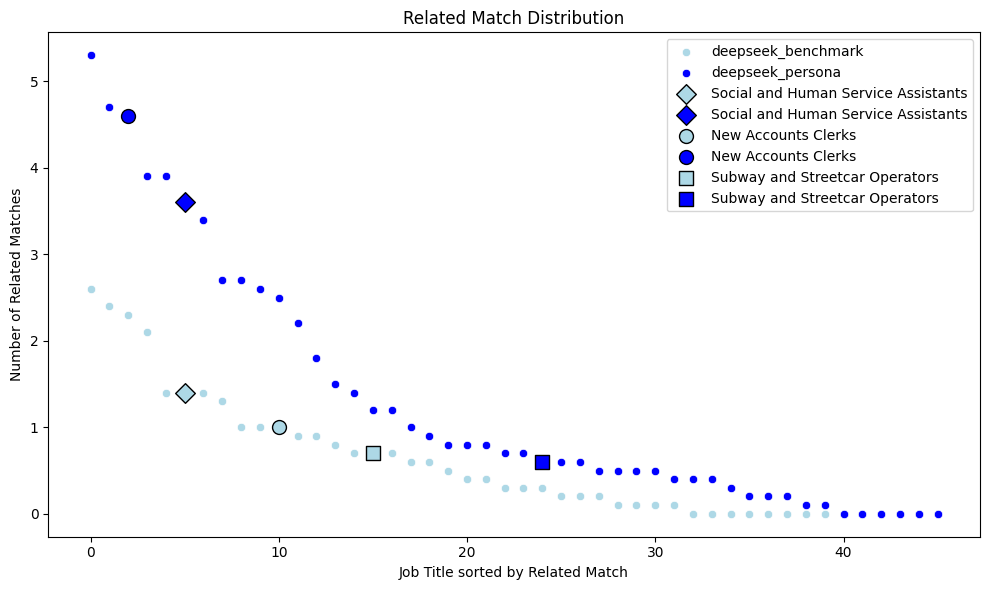

In [269]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Create figure
plt.figure(figsize=(10, 6))

# Colors for the three groups (each group has a light and dark shade)
colors = [
        ('lightblue', 'blue'),
        ('lightgreen', 'green'),
        ('lightsalmon', 'red')  # lighter red
]

# Process 6 files (3 groups of 2)
for group_idx in range(1):
    # Calculate file indices for each group (0-1, 2-3, 4-5)
    file1_idx = group_idx * 2
    file2_idx = file1_idx + 1
    model1 = model_name[file1_idx]
    model2 = model_name[file2_idx]
    
    # Read and process first file of the group
    df1 = pd.read_json(os.path.join(folder_name, json_files[file1_idx]), lines=False).dropna()
    data1 = (df1.groupby("title")
            .agg({"perfect_match": "mean", "related": "mean"})
            .sort_values(by="related", ascending=False)
            .reset_index())
    data1['index'] = np.arange(len(data1))
    
    # Read and process second file of the group
    df2 = pd.read_json(os.path.join(folder_name, json_files[file2_idx]), lines=False).dropna()
    data2 = (df2.groupby("title")
            .agg({"perfect_match": "mean", "related": "mean"})
            .sort_values(by="related", ascending=False)
            .reset_index())
    data2['index'] = np.arange(len(data2))
    
# Plot both lines with corresponding colors
    sns.scatterplot(data=data1, x='index', y="related", color=colors[group_idx][0],label=model1)
    sns.scatterplot(data=data2, x='index', y="related", color=colors[group_idx][1],label=model2)

shapes = ['D', 'o', 's']  # Different shapes for the dots
for idx, x in enumerate(range(5,16,5)):
        dot_index = x
        dot_x = data1.loc[dot_index, 'index']
        dot_y = data1.loc[dot_index, 'related']
        # Highlight the dot with a different shape
        plt.scatter(dot_x, dot_y, color=colors[group_idx][0], edgecolor='black', s=100, marker=shapes[idx], label=f"{data1['title'].loc[dot_index]}")

        dot_index = data2[data2["title"] == data1["title"].loc[dot_index]].index[0]
        dot_x = data2.loc[dot_index, 'index']
        dot_y = data2.loc[dot_index, 'related']
        # Highlight the dot with a different shape
        plt.scatter(dot_x, dot_y, color=colors[group_idx][1], edgecolor='black', s=100, marker=shapes[idx], label=f"{data2['title'].loc[dot_index]}")



# Add plot details
plt.title('Related Match Distribution')
plt.xlabel('Job Title sorted by Related Match')
plt.ylabel('Number of Related Matches')
plt.legend(loc='upper right')
plt.tight_layout()

# Show plot
plt.show()

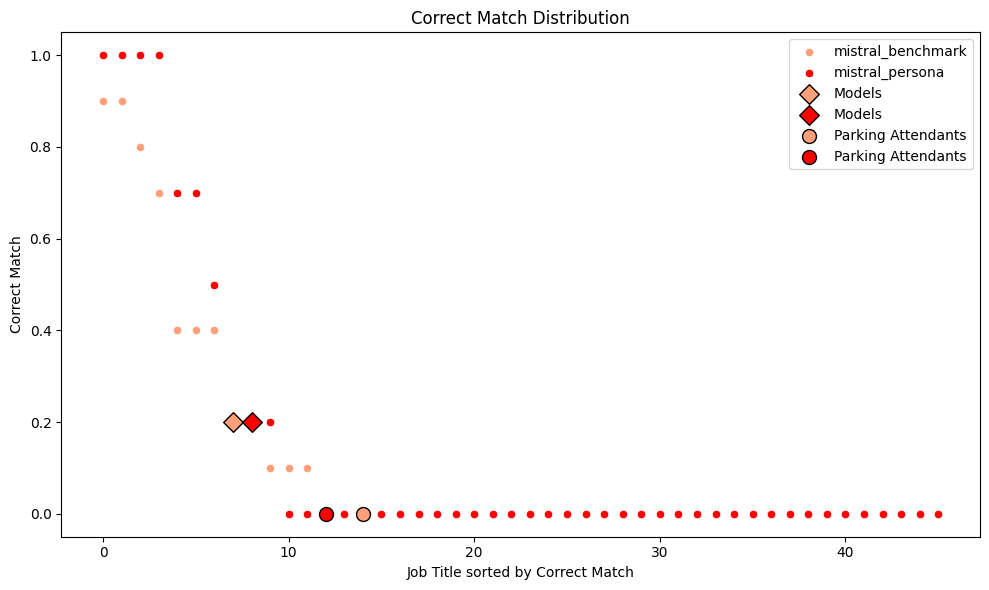

In [308]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Create figure
plt.figure(figsize=(10, 6))

# Colors for the three groups (each group has a light and dark shade)
colors = [
        ('lightblue', 'blue'),
        ('lightgreen', 'green'),
        ('lightsalmon', 'red')  # lighter red
]

# Process 6 files (3 groups of 2)
for group_idx in range(2,3):
    # Calculate file indices for each group (0-1, 2-3, 4-5)
    file1_idx = group_idx * 2
    file2_idx = file1_idx + 1
    model1 = model_name[file1_idx]
    model2 = model_name[file2_idx]
    
    # Read and process first file of the group
    df1 = pd.read_json(os.path.join(folder_name, json_files[file1_idx]), lines=False).dropna()
    data1 = (df1.groupby("title")
            .agg({"perfect_match": "mean", "related": "mean"})
            .sort_values(by="perfect_match", ascending=False)
            .reset_index())
    data1['index'] = np.arange(len(data1))
    
    # Read and process second file of the group
    df2 = pd.read_json(os.path.join(folder_name, json_files[file2_idx]), lines=False).dropna()
    data2 = (df2.groupby("title")
            .agg({"perfect_match": "mean", "related": "mean"})
            .sort_values(by="perfect_match", ascending=False)
            .reset_index())
    data2['index'] = np.arange(len(data2))
    
# Plot both lines with corresponding colors
    sns.scatterplot(data=data1, x='index', y="perfect_match", color=colors[group_idx][0],label=model1)
    sns.scatterplot(data=data2, x='index', y="perfect_match", color=colors[group_idx][1],label=model2)

shapes = ['D', 'o', 's']  # Different shapes for the dots
# for idx, x in enumerate(range(5,18,6)):
dot_index = data1[data1["title"] == "Models"].index[0]
dot_x = data1.loc[dot_index, 'index']
dot_y = data1.loc[dot_index, 'perfect_match']
# Highlight the dot with a different shape
plt.scatter(dot_x, dot_y, color=colors[group_idx][0], edgecolor='black', s=100, marker=shapes[0], label=f"{data1['title'].loc[dot_index]}")

dot_index = data2[data2["title"] == data1["title"].loc[dot_index]].index[0]
dot_x = data2.loc[dot_index, 'index']
dot_y = data2.loc[dot_index, 'perfect_match']
# Highlight the dot with a different shape
plt.scatter(dot_x, dot_y, color=colors[group_idx][1], edgecolor='black', s=100, marker=shapes[0], label=f"{data2['title'].loc[dot_index]}")

dot_index = data1[data1["title"] == "Parking Attendants"].index[0]
dot_x = data1.loc[dot_index, 'index']
dot_y = data1.loc[dot_index, 'perfect_match']
# Highlight the dot with a different shape
plt.scatter(dot_x, dot_y, color=colors[group_idx][0], edgecolor='black', s=100, marker=shapes[1], label=f"{data1['title'].loc[dot_index]}")

dot_index = data2[data2["title"] == data1["title"].loc[dot_index]].index[0]
dot_x = data2.loc[dot_index, 'index']
dot_y = data2.loc[dot_index, 'perfect_match']
# Highlight the dot with a different shape
plt.scatter(dot_x, dot_y, color=colors[group_idx][1], edgecolor='black', s=100, marker=shapes[1], label=f"{data2['title'].loc[dot_index]}")



# Add plot details
plt.title('Correct Match Distribution')
plt.xlabel('Job Title sorted by Correct Match')
plt.ylabel('Correct Match')
plt.legend(loc='upper right')
plt.tight_layout()

# Show plot
plt.show()

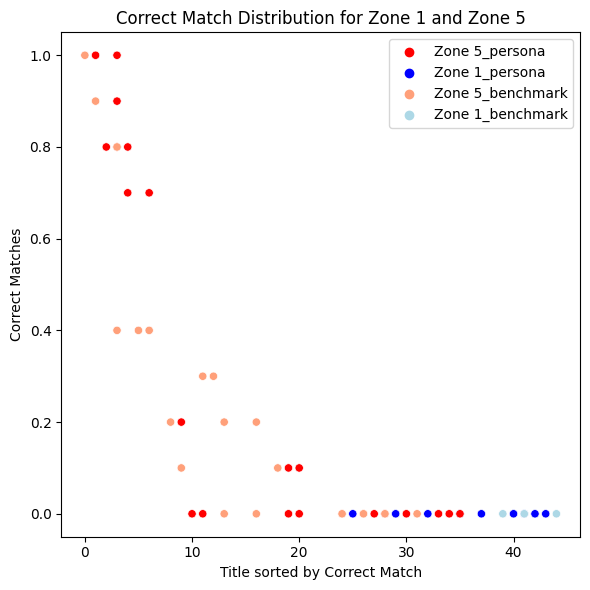

In [20]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
plt.figure(figsize=(6, 6))

# Process 6 files (3 groups of 2)
for group_idx in range(3):
    # Calculate file indices for each group (0-1, 2-3, 4-5)
    file1_idx = group_idx * 2
    file2_idx = file1_idx + 1
    model1 = model_name[file1_idx]
    
    # Read and process first file of the group
    df1 = pd.read_json(os.path.join(folder_name, json_files[file1_idx]), lines=False).dropna()
    data1 = (df1.groupby("title")
            .agg({"perfect_match": "mean", "related": "mean"})
            .sort_values(by="perfect_match", ascending=False)
            .reset_index())
    data1 = pd.merge(data1, jz, how='left', left_on='title', right_on='title')
    data1['index'] = np.arange(len(data1))
    
    # Filter to include only Zone 5 and Zone 1
    data1 = data1[data1['zone'].isin([1, 5])]
    
    # Assign colors based on job zone
    data1['zone_color'] = data1['zone'].apply(lambda x: 'lightsalmon' if x == 5 else 'lightblue')

    # Read and process second file of the group
    df2 = pd.read_json(os.path.join(folder_name, json_files[file2_idx]), lines=False).dropna()
    data2 = (df2.groupby("title")
            .agg({"perfect_match": "mean", "related": "mean"})
            .sort_values(by="perfect_match", ascending=False)
            .reset_index())
    data2 = pd.merge(data2, jz, how='left', left_on='title', right_on='title')
    data2['index'] = np.arange(len(data2))
    
    # Filter to include only Zone 5 and Zone 1
    data2 = data2[data2['zone'].isin([1, 5])]
    
    # Assign colors based on job zone
    data2['zone_color'] = data2['zone'].apply(lambda x: 'red' if x == 5 else 'blue')
    
    # Plot data1 with custom colors
    sns.scatterplot(
        data=data1, x='index', y="perfect_match", hue='zone_color', 
        palette={'lightsalmon': 'lightsalmon', 'lightblue': 'lightblue'},
        legend=False
    )
    
    # Plot data2 with custom colors
    sns.scatterplot(
        data=data2, x='index', y="perfect_match", hue='zone_color', 
        palette={'red': 'red', 'blue': 'blue'},
        legend=False
    )

# Add plot details
plt.title('Correct Match Distribution for Zone 1 and Zone 5')
plt.xlabel('Title sorted by Correct Match')
plt.ylabel('Correct Matches')

# Add a legend
plt.scatter([], [], color='red', label='Zone 5_persona')
plt.scatter([], [], color='blue', label='Zone 1_persona')
plt.scatter([], [], color='lightsalmon', label='Zone 5_benchmark')
plt.scatter([], [], color='lightblue', label='Zone 1_benchmark')
plt.legend(loc='upper right', fontsize=10, title_fontsize='13')
plt.tight_layout()

# Show plot
plt.show()

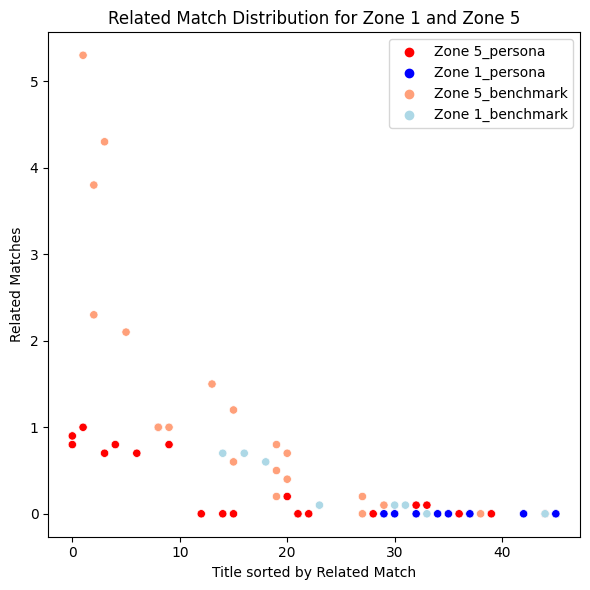

In [437]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
plt.figure(figsize=(6, 6))

# Process 6 files (3 groups of 2)
for group_idx in range(3):
    # Calculate file indices for each group (0-1, 2-3, 4-5)
    file1_idx = group_idx * 2
    file2_idx = file1_idx + 1
    model1 = model_name[file1_idx]
    
    # Read and process first file of the group
    df1 = pd.read_json(os.path.join(folder_name, json_files[file1_idx]), lines=False).dropna()
    data1 = (df1.groupby("title")
            .agg({"perfect_match": "mean", "related": "mean"})
            .sort_values(by="related", ascending=False)
            .reset_index())
    data1 = pd.merge(data1, jz, how='left', left_on='title', right_on='title')
    data1['index'] = np.arange(len(data1))
    
    # Filter to include only Zone 5 and Zone 1
    data1 = data1[data1['zone'].isin([1, 5])]
    
    # Assign colors based on job zone
    data1['zone_color'] = data1['zone'].apply(lambda x: 'lightsalmon' if x == 5 else 'lightblue')

    # Read and process second file of the group
    df2 = pd.read_json(os.path.join(folder_name, json_files[file2_idx]), lines=False).dropna()
    data2 = (df2.groupby("title")
            .agg({"perfect_match": "mean", "related": "mean"})
            .sort_values(by="related", ascending=False)
            .reset_index())
    data2 = pd.merge(data2, jz, how='left', left_on='title', right_on='title')
    data2['index'] = np.arange(len(data2))
    
    # Filter to include only Zone 5 and Zone 1
    data2 = data2[data2['zone'].isin([1, 5])]
    
    # Assign colors based on job zone
    data2['zone_color'] = data2['zone'].apply(lambda x: 'red' if x == 5 else 'blue')
    
    # Plot data1 with custom colors
    sns.scatterplot(
        data=data1, x='index', y="related", hue='zone_color', 
        palette={'lightsalmon': 'lightsalmon', 'lightblue': 'lightblue'},
        legend=False
    )
    
    # Plot data2 with custom colors
    sns.scatterplot(
        data=data2, x='index', y="perfect_match", hue='zone_color', 
        palette={'red': 'red', 'blue': 'blue'},
        legend=False
    )

# Add plot details
plt.title('Related Match Distribution for Zone 1 and Zone 5')
plt.xlabel('Title sorted by Related Match')
plt.ylabel('Related Matches')

# Add a legend
plt.scatter([], [], color='red', label='Zone 5_persona')
plt.scatter([], [], color='blue', label='Zone 1_persona')
plt.scatter([], [], color='lightsalmon', label='Zone 5_benchmark')
plt.scatter([], [], color='lightblue', label='Zone 1_benchmark')
plt.legend(loc='upper right', fontsize=10, title_fontsize='13')
plt.tight_layout()

# Show plot
plt.show()

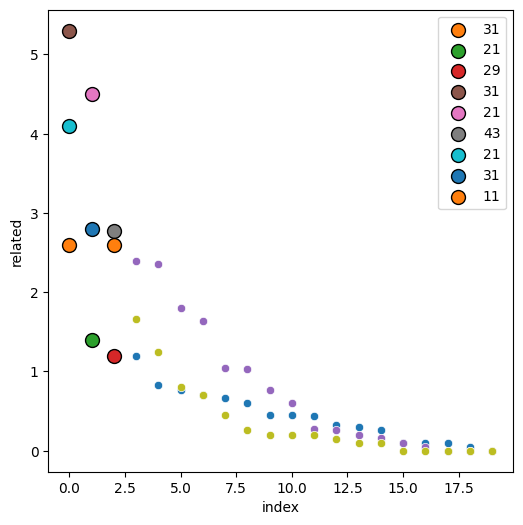

In [485]:
# Create figure
plt.figure(figsize=(6, 6))

# Process 6 files (3 groups of 2)
for group_idx in range(3):
    # Calculate file indices for each group (0-1, 2-3, 4-5)
    file1_idx = group_idx * 2
    file2_idx = file1_idx + 1
    model1 = model_name[file1_idx]

    df1 = pd.read_json(os.path.join(folder_name, json_files[file1_idx]), lines=False).dropna()
    data1 = (df1.groupby("ind")
            .agg({"perfect_match": "mean", "related": "mean"})
            .sort_values(by="related", ascending=False)
            .reset_index())

    data1['index'] = np.arange(len(data1))

    df2 = pd.read_json(os.path.join(folder_name, json_files[file1_idx]), lines=False).dropna()
    data2 = (df2.groupby("ind")
            .agg({"perfect_match": "mean", "related": "mean"})
            .sort_values(by="related", ascending=False)
            .reset_index())

    data2['index'] = np.arange(len(data2))

#     sns.scatterplot(
#         data=data1, x='index', y="related", 
#         # palette={'lightsalmon': 'lightsalmon', 'lightblue': 'lightblue'},
#         legend=False
#     )
    
    # Plot data2 with custom colors
    sns.scatterplot(
        data=data2, x='index', y="related", 
        # palette={'red': 'red', 'blue': 'blue'},
        legend=False
    )
    for x in range(3):
        dot_index = x
        dot_x = data2.loc[dot_index, 'index']
        dot_y = data2.loc[dot_index, 'related']
        # Highlight the dot with a different shape
        plt.scatter(dot_x, dot_y, edgecolor='black', s=100, marker="o", label=f"{data2['ind'].loc[dot_index]}")
plt.legend(loc='upper right')

In [462]:
df1

,title,ind,rating,iteration,perfect_match,related
0,"Property, Real Estate, and Community Associati...",11,3.344343e+59,5,0,3
1,General and Operations Managers,11,3.445514e+59,5,0,4
2,Emergency Management Directors,11,5.334134e+59,5,1,0
3,Sustainability Specialists,13,4.555546e+59,5,0,0
4,Project Management Specialists,13,1.554553e+59,5,0,0
...,...,...,...,...,...,...
455,"Patternmakers, Metal and Plastic",51,5.443533e+59,4,0,0
456,"Extruding and Drawing Machine Setters, Operato...",51,4.433333e+59,4,0,0
457,Commercial Pilots,53,4.343556e+59,4,0,0
458,Parking Attendants,53,3.243234e+59,4,0,0


plot general matching result, only consider performance by run

Descriptive Statistics:
deepseek_benchmark: Mean = 0.5870, Variance = 0.0258
deepseek_persona: Mean = 1.3261, Variance = 0.0401
llama3.2_benchmark: Mean = 1.2000, Variance = 0.0169
llama3.2_persona: Mean = 1.7217, Variance = 0.0361
mistral_benchmark: Mean = 0.6891, Variance = 0.0223
mistral_persona: Mean = 0.9500, Variance = 0.0095

Levene's Test for Equal Variances: p-value = 0.4022

ANOVA Results:
F-statistic: 64.4955
p-value: 0.0000
Result: Reject the null hypothesis. There is a significant difference between the groups.


C:\Users\godfr\AppData\Local\Temp\ipykernel_27236\3786138767.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(groups, labels=labels, patch_artist=True)  # Enable patch_artist for custom colors


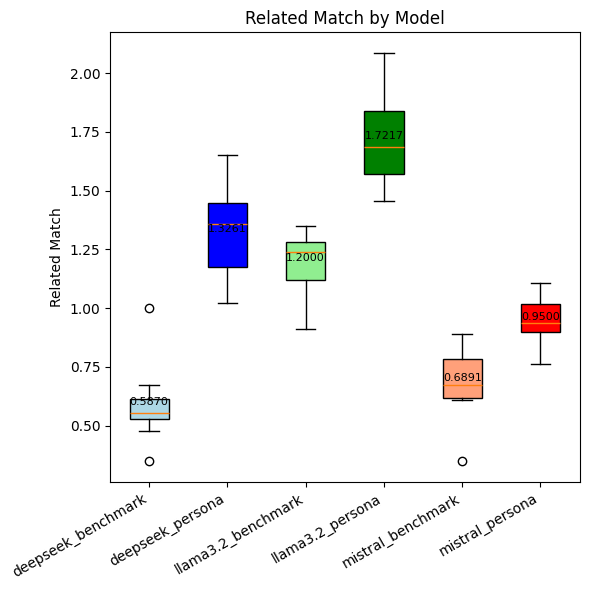

In [456]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

groups = related_array_list
labels = model_name

# Descriptive stats
print("Descriptive Statistics:")
for label, group in zip(labels, groups):
    print(f"{label}: Mean = {np.mean(group):.4f}, Variance = {np.var(group):.4f}")

# Check for equal variances (Levene's test)
levene_stat, levene_p = stats.levene(*groups)
print(f"\nLevene's Test for Equal Variances: p-value = {levene_p:.4f}")
if levene_p < 0.05:
    print("Warning: Variances may not be equal (p < 0.05). Consider a robust alternative if significant.")

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(f"\nANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference between the groups.")

# Boxplot for visualization
plt.figure(figsize=(6, 6))
box = plt.boxplot(groups, labels=labels, patch_artist=True)  # Enable patch_artist for custom colors

# Define colors for each group
colors = ['lightblue', 'blue', 'lightgreen', 'green', 'lightsalmon', 'red']

# Apply colors to the boxplot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Related Match')
plt.title('Related Match by Model')

# Make the end of xtick labels align with the ticks
plt.gca().set_xticklabels(labels, rotation=30, ha='right')

# Annotate the mean of each group
for i, group in enumerate(groups):
    mean = np.mean(group)
    plt.annotate(f'{mean:.4f}', xy=(i + 1, mean), xytext=(i + 1, mean),
                 fontsize=8, ha='center')

plt.tight_layout()
plt.show()

C:\Users\godfr\AppData\Local\Temp\ipykernel_27236\2722410880.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(groups, labels=labels, patch_artist=True)  # Enable patch_artist for custom colors


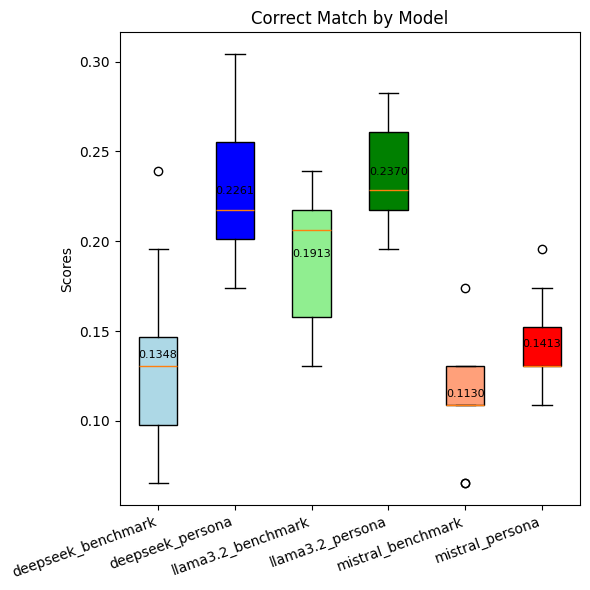

In [458]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

groups = perfect_array_list
labels = model_name

# Boxplot for visualization
plt.figure(figsize=(6, 6))
box = plt.boxplot(groups, labels=labels, patch_artist=True)  # Enable patch_artist for custom colors

# Define colors for each group
colors = ['lightblue', 'blue', 'lightgreen', 'green', 'lightsalmon', 'red']

# Apply colors to the boxplot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Scores')
plt.title('Correct Match by Model')

# Make the end of xtick labels align with the ticks
plt.gca().set_xticklabels(labels, rotation=20, ha='right')

# Annotate the mean of each group
for i, group in enumerate(groups):
    mean = np.mean(group)
    plt.annotate(f'{mean:.4f}', xy=(i + 1, mean), xytext=(i + 1, mean),
                 fontsize=8, ha='center')

plt.tight_layout()
plt.show()

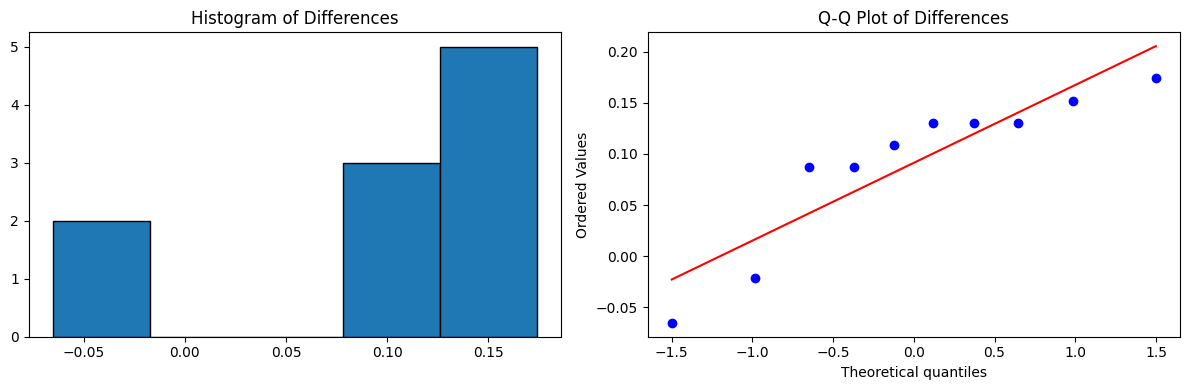

Shapiro-Wilk Statistic: 0.8356, P-value: 0.0391
Anderson-Darling Statistic: 0.7774
Critical Value at 15.0%: 0.5010, Not Normal
Critical Value at 10.0%: 0.5700, Not Normal
Critical Value at 5.0%: 0.6840, Not Normal
Critical Value at 2.5%: 0.7980, Normal
Critical Value at 1.0%: 0.9500, Normal


In [199]:
#check if the the data is normally distributed
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
i = 0

df1 = pd.read_json(os.path.join(folder_name, json_files[i]), lines=False).dropna()

df2 = pd.read_json(os.path.join(folder_name, json_files[i+1]), lines=False).dropna()

# Example data

# control_means = df1.groupby("iteration")["related"].mean().to_numpy()
# test_means = df2.groupby("iteration")["related"].mean().to_numpy()

control_means = df1.groupby("iteration")["perfect_match"].mean().to_numpy()
test_means = df2.groupby("iteration")["perfect_match"].mean().to_numpy()
differences = test_means - control_means

# Histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(differences, bins=5, edgecolor='black')
plt.title("Histogram of Differences")

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(differences, dist="norm", plot=plt)
plt.title("Q-Q Plot of Differences")
plt.tight_layout()
plt.show()

# Shapiro-Wilk Test
stat, p_value = stats.shapiro(differences)
print(f"Shapiro-Wilk Statistic: {stat:.4f}, P-value: {p_value:.4f}")

# Anderson-Darling Test
result = stats.anderson(differences)
print(f"Anderson-Darling Statistic: {result.statistic:.4f}")
for crit_val, sig_level in zip(result.critical_values, result.significance_level):
    print(f"Critical Value at {sig_level}%: {crit_val:.4f}, {'Normal' if result.statistic < crit_val else 'Not Normal'}")

In [497]:
# data is not normally distributed, use the Wilcoxon signed-rank test
# find the p-value for the Wilcoxon signed-rank test for the two models, general performance
from scipy.stats import wilcoxon
i = 4

df1 = pd.read_json(os.path.join(folder_name, json_files[i]), lines=False).dropna()
df2 = pd.read_json(os.path.join(folder_name, json_files[i+1]), lines=False).dropna()


# Example mean scores for 10 runs
control_means = df1.groupby("iteration")["perfect_match"].mean().to_numpy()
test_means = df2.groupby("iteration")["perfect_match"].mean().to_numpy()
 
stat, p_value = wilcoxon(test_means, control_means, alternative='greater')  # One-tailed
print(f"Statistic: {stat:.4f}, P-value: {p_value:.4f}")


# Example mean scores for 10 runs
control_means = df1.groupby("iteration")["related"].mean().to_numpy()
test_means = df2.groupby("iteration")["related"].mean().to_numpy()

stat, p_value = wilcoxon(test_means, control_means, alternative='greater')  # One-tailed
print(f"Statistic: {stat:.4f}, P-value: {p_value:.4f}")


Statistic: 27.0000, P-value: 0.0156
Statistic: 55.0000, P-value: 0.0010


Check significance in title, ind and zone in terms of perfect match

In [511]:
i = 2
df1 = pd.read_json(os.path.join(folder_name, json_files[i]), lines=False).dropna()
df2 = pd.read_json(os.path.join(folder_name, json_files[i+1]), lines=False).dropna()
df1 = pd.merge(df1, jz, on="title", how="left")
df2 = pd.merge(df2, jz, on="title", how="left")

In [271]:
# find which items are significant
import numpy as np
from scipy.stats import wilcoxon

# Example data (replace with your actual data)
control_data = np.array(df1.groupby('title')['perfect_match'].apply(np.array).reset_index()["perfect_match"].tolist()).T
test_data = np.array(df2.groupby('title')['perfect_match'].apply(np.array).reset_index()["perfect_match"].tolist()).T

# Mean scores per item
control_item_means = np.mean(control_data, axis=0)
test_item_means = np.mean(test_data, axis=0)
item_differences = test_item_means - control_item_means

# Wilcoxon test per job with error handling
p_values = []
differences = []
for job_idx in range(test_data.shape[1]):
    control_scores = control_data[:, job_idx]
    test_scores = test_data[:, job_idx]
    diff = test_scores - control_scores
    differences.append(np.mean(diff))  # Store mean difference for ranking
    if np.all(diff == 0):
        p_values.append(1.0)  # No difference, p=1 (not significant)
    else:
        stat, p_value = wilcoxon(test_scores, control_scores, alternative='greater')
        p_values.append(p_value)

# Convert to arrays
p_values = np.array(p_values)
differences = np.array(differences)

# Top jobs by improvement (significant and large differences)
significant_mask = p_values < 0.05
significant_jobs = np.where(significant_mask)[0]
significant_diffs = differences[significant_mask]
p_diffs = p_values[significant_mask]

# Sort by difference
top_jobs = significant_jobs[np.argsort(significant_diffs)[::-1]]
top_jobs_p = significant_jobs[np.argsort(p_diffs)]

# print("Top significant jobs (p < 0.05) by improvement:")
# for idx in top_jobs[:]:  # Top 5
#     print(f"Job: {df['title'][idx]}, Diff: {differences[idx]:.2f}, P-value: {p_values[idx]:.4f}")

# print("Top significant jobs (p < 0.05) by p value:")
# for idx in top_jobs_p[:]:  # Top 5
#     print(f"Job: {df['title'][idx]}, Diff: {differences[idx]:.2f}, P-value: {p_values[idx]:.4f}")

df_top = pd.DataFrame({
    'job': df1['title'].iloc[top_jobs_p],
    'p_value': p_values[top_jobs_p]
})
df_top

,job,p_value
43,Commercial Pilots,0.007153


In [272]:
# find which industries are significant
import numpy as np
from scipy.stats import wilcoxon

# Example data (replace with your actual data)
control_ind_mean = df1.groupby(['ind', 'iteration'])['perfect_match'].mean().reset_index()
test_ind_mean = df2.groupby(['ind', 'iteration'])['perfect_match'].mean().reset_index()

control_array = control_ind_mean.pivot(index="iteration", columns="ind", values="perfect_match").to_numpy()
test_array = test_ind_mean.pivot(index="iteration", columns="ind", values="perfect_match").to_numpy()


# Wilcoxon test per industry
industries = test_ind_mean["ind"].unique()
p_values = []
differences = []
for i, industry in enumerate(industries):
    test_scores = test_array[:, i]
    control_scores = control_array[:, i]
    diff = test_scores - control_scores
    differences.append(np.mean(diff))
    if np.all(diff == 0):
        p_values.append(1.0)
    else:
        stat, p_value = wilcoxon(test_scores, control_scores, alternative='greater')
        p_values.append(p_value)

# Create a DataFrame with results
results_df = pd.DataFrame({
    "industry": industries,
    "p_value": p_values
})

# Sort by p_value ascending
results_df = results_df[results_df["p_value"] < 0.05].sort_values(by="p_value", ascending=True)

# Display the DataFrame
print("\nWilcoxon test results per industry (sorted by p-value):")
results_df


Wilcoxon test results per industry (sorted by p-value):


,industry,p_value
18,51,0.007153


In [273]:
# now let find job zone significance 

control_ind_mean = df1.groupby(['zone', 'iteration'])['perfect_match'].mean().reset_index()
test_ind_mean = df2.groupby(['zone', 'iteration'])['perfect_match'].mean().reset_index()

control_array = control_ind_mean.pivot(index="iteration", columns='zone', values="perfect_match").to_numpy()
test_array = test_ind_mean.pivot(index="iteration", columns='zone', values="perfect_match").to_numpy()

# Wilcoxon test per zone
zones = test_ind_mean['zone'].unique()
p_values = []
differences = []
for i, zone in enumerate(zones):
    test_scores = test_array[:, i]
    control_scores = control_array[:, i]
    diff = test_scores - control_scores
    differences.append(np.mean(diff))
    if np.all(diff == 0):
        p_values.append(1.0)
    else:
        stat, p_value = wilcoxon(test_scores, control_scores, alternative='greater')
        p_values.append(p_value)

# Create a DataFrame with results
results_df = pd.DataFrame({
    "zone": zones,
    "p_value": p_values
})

# Sort by p_value ascending
results_df = results_df[results_df["p_value"] < 0.05].sort_values(by="p_value", ascending=True)

# Display the DataFrame
print("\nWilcoxon test results per zone (sorted by p-value):")
results_df



Wilcoxon test results per zone (sorted by p-value):


,zone,p_value


Do the same for related match

In [ ]:
# find which items are significant
import numpy as np
from scipy.stats import wilcoxon
i = 0

df1 = pd.read_json(os.path.join(folder_name, json_files[i]), lines=False).dropna()
df2 = pd.read_json(os.path.join(folder_name, json_files[i+1]), lines=False).dropna()

# Example data (replace with your actual data)
control_data = np.array(df1.groupby('title')['related'].apply(np.array).reset_index()["related"].tolist()).T
test_data = np.array(df2.groupby('title')['related'].apply(np.array).reset_index()["related"].tolist()).T

# Mean scores per item
control_item_means = np.mean(control_data, axis=0)
test_item_means = np.mean(test_data, axis=0)
item_differences = test_item_means - control_item_means

# Wilcoxon test per job with error handling
p_values = []
differences = []
for job_idx in range(test_data.shape[1]):
    control_scores = control_data[:, job_idx]
    test_scores = test_data[:, job_idx]
    diff = test_scores - control_scores
    differences.append(np.mean(diff))  # Store mean difference for ranking
    if np.all(diff == 0):
        p_values.append(1.0)  # No difference, p=1 (not significant)
    else:
        stat, p_value = wilcoxon(test_scores, control_scores, alternative='greater')
        p_values.append(p_value)

# Convert to arrays
p_values = np.array(p_values)
differences = np.array(differences)

# Top jobs by improvement (significant and large differences)
significant_mask = p_values < 0.05
significant_jobs = np.where(significant_mask)[0]
significant_diffs = differences[significant_mask]
p_diffs = p_values[significant_mask]

# Sort by difference
top_jobs = significant_jobs[np.argsort(significant_diffs)[::-1]]
top_jobs_p = significant_jobs[np.argsort(p_diffs)]

# print("Top significant jobs (p < 0.05) by improvement:")
# for idx in top_jobs[:]:  # Top 5
#     print(f"Job: {df['title'][idx]}, Diff: {differences[idx]:.2f}, P-value: {p_values[idx]:.4f}")

# print("Top significant jobs (p < 0.05) by p value:")
# for idx in top_jobs_p[:]:  # Top 5
#     print(f"Job: {df['title'][idx]}, Diff: {differences[idx]:.2f}, P-value: {p_values[idx]:.4f}")

df_top = pd.DataFrame({
    'job': df1['title'].iloc[top_jobs_p],
    'p_value': p_values[top_jobs_p]
})
df_top

,job,p_value
38,Timing Device Assemblers and Adjusters,0.003229
27,Embalmers,0.003303
26,Skincare Specialists,0.009815
4,Project Management Specialists,0.011822
10,Geographers,0.011822
34,Helpers--Roofers,0.012798
37,"Heating, Air Conditioning, and Refrigeration M...",0.018555
1,General and Operations Managers,0.019217
0,"Property, Real Estate, and Community Associati...",0.022750
20,Nurse Practitioners,0.024499


In [ ]:
# find which industries are significant
import numpy as np
from scipy.stats import wilcoxon

# Example data (replace with your actual data)
control_ind_mean = df1.groupby(['ind', 'iteration'])['related'].mean().reset_index()
test_ind_mean = df2.groupby(['ind', 'iteration'])['related'].mean().reset_index()

control_array = control_ind_mean.pivot(index="iteration", columns="ind", values="related").to_numpy()
test_array = test_ind_mean.pivot(index="iteration", columns="ind", values="related").to_numpy()


# Wilcoxon test per industry
industries = test_ind_mean["ind"].unique()
p_values = []
differences = []
for i, industry in enumerate(industries):
    test_scores = test_array[:, i]
    control_scores = control_array[:, i]
    diff = test_scores - control_scores
    differences.append(np.mean(diff))
    if np.all(diff == 0):
        p_values.append(1.0)
    else:
        stat, p_value = wilcoxon(test_scores, control_scores, alternative='greater')
        p_values.append(p_value)

# Create a DataFrame with results
results_df = pd.DataFrame({
    "industry": industries,
    "p_value": p_values
})

# Sort by p_value ascending
results_df = results_df[results_df["p_value"] < 0.05].sort_values(by="p_value", ascending=True)

# Display the DataFrame
print("\nWilcoxon test results per industry (sorted by p-value):")
results_df


Wilcoxon test results per industry (sorted by p-value):


,industry,p_value
14,43,0.001953


In [235]:
# now let find job zone significance 
df1 = pd.read_json(os.path.join(folder_name, json_files[i]), lines=False).dropna()
df1 = pd.merge(df1, jz, on="title", how="left")
df2 = pd.read_json(os.path.join(folder_name, json_files[i+1]), lines=False).dropna()
df2 = pd.merge(df2, jz, on="title", how="left")

control_ind_mean = df1.groupby(['zone', 'iteration'])['related'].mean().reset_index()
test_ind_mean = df2.groupby(['zone', 'iteration'])['related'].mean().reset_index()

control_array = control_ind_mean.pivot(index="iteration", columns='zone', values="related").to_numpy()
test_array = test_ind_mean.pivot(index="iteration", columns='zone', values="related").to_numpy()

# Wilcoxon test per zone
zones = test_ind_mean['zone'].unique()
p_values = []
differences = []
for i, zone in enumerate(zones):
    test_scores = test_array[:, i]
    control_scores = control_array[:, i]
    diff = test_scores - control_scores
    differences.append(np.mean(diff))
    if np.all(diff == 0):
        p_values.append(1.0)
    else:
        stat, p_value = wilcoxon(test_scores, control_scores, alternative='greater')
        p_values.append(p_value)

# Create a DataFrame with results
results_df = pd.DataFrame({
    "zone": zones,
    "p_value": p_values
})

# Sort by p_value ascending
results_df = results_df[results_df["p_value"] < 0.05].sort_values(by="p_value", ascending=True)

# Display the DataFrame
print("\nWilcoxon test results per zone (sorted by p-value):")
results_df



Wilcoxon test results per zone (sorted by p-value):


,zone,p_value
2,3,0.001953
1,2,0.033158


lets look at individual model performance

In [ ]:
# by title
individual_df = df2.groupby("title").agg(
    mean_perfect_match=('perfect_match', 'mean'),
    mean_related=('related', 'mean')
).reset_index()
individual_df["mean_related"] = individual_df["mean_related"].apply(lambda x: x/10)
# individual_df.sort_values(by="mean_perfect_match", ascending=False).head(5)[["title"]]
individual_df.sort_values(by="mean_related", ascending=False).head(5)[["title"]]




,title
20,General and Operations Managers
38,"Special Education Teachers, Preschool"
37,Social and Human Service Assistants
28,Nurse Practitioners
2,Billing and Posting Clerks


In [355]:
#by zone
i = 4
df1 = pd.read_json(os.path.join(folder_name, json_files[i]), lines=False).dropna()
df2 = pd.read_json(os.path.join(folder_name, json_files[i+1]), lines=False).dropna()
df1 = pd.merge(df1, jz, on="title", how="left")
df2 = pd.merge(df2, jz, on="title", how="left")

individual_df = df2.groupby("zone").agg(
    mean_perfect_match=('perfect_match', 'mean'),
    mean_related=('related', 'mean')
).reset_index()
individual_df["mean_related"] = individual_df["mean_related"].apply(lambda x: x/10)
individual_df.sort_values(by="mean_perfect_match", ascending=False).head(5)[["zone"]]
# individual_df.sort_values(by="mean_related", ascending=False).head(5)[["ind"]]




,zone
4,5
1,2
3,4
2,3
0,1


Archive - t test and anova arent suitable tests but code example

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

def perform_one_tailed_ttest(group):
    llma_scores = group[group["model"] == model_name[i]]["perfect_match"]
    llmb_scores = group[group["model"] == model_name[i + 1]]["perfect_match"]
    # t-test with LLMb - LLMa (test - control)
    t_stat, p_two_tailed = ttest_ind(llmb_scores, llma_scores, equal_var=False)  # Note the order
    # One-tailed p-value: LLMb > LLMa
    p_one_tailed = p_two_tailed / 2 if t_stat > 0 else 1 - (p_two_tailed / 2)
    return pd.Series({"t_stat": t_stat, "p_one_tailed": p_one_tailed})

In [31]:
i = 0
key = "title"
df1 = pd.read_json(os.path.join(folder_name, json_files[i]), lines=False).dropna()
df2 = pd.read_json(os.path.join(folder_name, json_files[i+1]), lines=False).dropna()


df1["model"] = model_name[i]
df2["model"] = model_name[i + 1]
combined_df = pd.concat([df1, df2], axis=0)
combined_df = pd.merge(combined_df, jz, on="title", how="left")
results = combined_df.groupby(key).apply(perform_one_tailed_ttest).reset_index()
print(f"One-Tailed t-test Results ({model_name[i + 1]} > {model_name[i]}):")
# results.sort_values(by="p_one_tailed", ascending=True)[[key, "p_one_tailed"]]
results[results["p_one_tailed"] < 0.05].sort_values(by="p_one_tailed", ascending=True)[[key, "p_one_tailed"]]

One-Tailed t-test Results (deepseek_prompt_1 > deepseek_no_prompt):


c:\Users\godfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\godfr\AppData\Local\Temp\ipykernel_14832\4161993618.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = combined_df.groupby(key).apply(perform_one_tailed_ttest).reset_index()


,title,p_one_tailed
27,New Accounts Clerks,0.000661
28,Nurse Practitioners,0.002581
4,Business Intelligence Analysts,0.007478
38,"Special Education Teachers, Preschool",0.037296
26,Models,0.040277
42,Talent Directors,0.040277
7,Civil Engineers,0.040563
32,Physical Therapist Aides,0.040563


In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine data for Tukey HSD
all_data = np.concatenate(groups)
group_labels = np.concatenate([[label] * 10 for label in labels])

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=all_data, groups=group_labels, alpha=0.05)
print("\nTukey HSD Post-Hoc Test:")
print(tukey)


Tukey HSD Post-Hoc Test:
            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1             group2      meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------------
deepseek_no_prompt deepseek_prompt_1   0.0913    0.0  0.0421  0.1405   True
deepseek_no_prompt   llama_no_prompt   0.0565 0.0156  0.0073  0.1057   True
deepseek_no_prompt    llama_prompt_1   0.1022    0.0  0.0529  0.1514   True
deepseek_no_prompt mistral_no_prompt  -0.0217 0.7811  -0.071  0.0275  False
deepseek_no_prompt  mistral_prompt_1   0.0065 0.9987 -0.0427  0.0557  False
 deepseek_prompt_1   llama_no_prompt  -0.0348 0.3091  -0.084  0.0144  False
 deepseek_prompt_1    llama_prompt_1   0.0109 0.9863 -0.0384  0.0601  False
 deepseek_prompt_1 mistral_no_prompt   -0.113    0.0 -0.1623 -0.0638   True
 deepseek_prompt_1  mistral_prompt_1  -0.0848 0.0001  -0.134 -0.0356   True
   llama_no_prompt    llama_prompt_1   0.0457 0.0838 -0.0036  

In [82]:
i = 1
key = "title"
print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "perfect_match": "mean",
    "related": "mean"
})[:3].reset_index().sort_values(by="perfect_match", ascending=False)[:][key].values.tolist())

print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "perfect_match": "mean",
    "related": "mean"
})[:3].reset_index().sort_values(by="related", ascending=False)[:][key].values.tolist())

['Art, Drama, and Music Teachers, Postsecondary', 'Bill and Account Collectors', 'Billing and Posting Clerks']
['Billing and Posting Clerks', 'Bill and Account Collectors', 'Art, Drama, and Music Teachers, Postsecondary']


In [48]:
key = "zone"
print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "perfect_match": "mean",
    "related": "mean"
}).reset_index().sort_values(by="perfect_match", ascending=False)[:][key].values.tolist())

print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "perfect_match": "mean",
    "related": "mean"
}).reset_index().sort_values(by="related", ascending=False)[:][key].values.tolist())

[5, 2, 4, 3, 1]
[5, 4, 3, 2, 1]


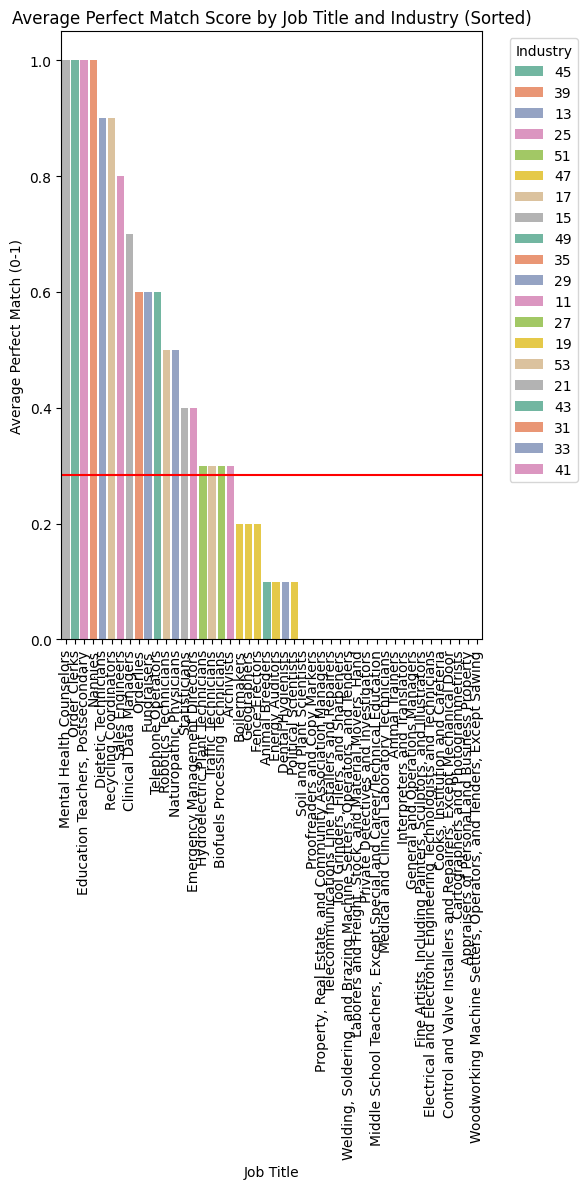

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame (e.g., no_prompt_df)
df["ind"] = df["ind"].astype(str)
df["zone"] = df["zone"].astype(str)

# Calculate mean perfect_match per title to determine sort order
order = df.groupby("title")["perfect_match"].mean().sort_values(ascending=False).index

# Create figure
plt.figure(figsize=(6, 12))

# Bar plot: mean perfect_match by title, colored by ind, sorted descending
sns.barplot(data=df, x="title", y="perfect_match", hue="ind", palette="Set2", order=order)
#add a mean score
plt.axhline(y= df["perfect_match"].sum() / len(df), color='r', linestyle='-')

# Customize
plt.xticks(rotation=90)
plt.title('Average Perfect Match Score by Job Title and Industry (Sorted)')
plt.xlabel('Job Title')
plt.ylabel('Average Perfect Match (0-1)')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

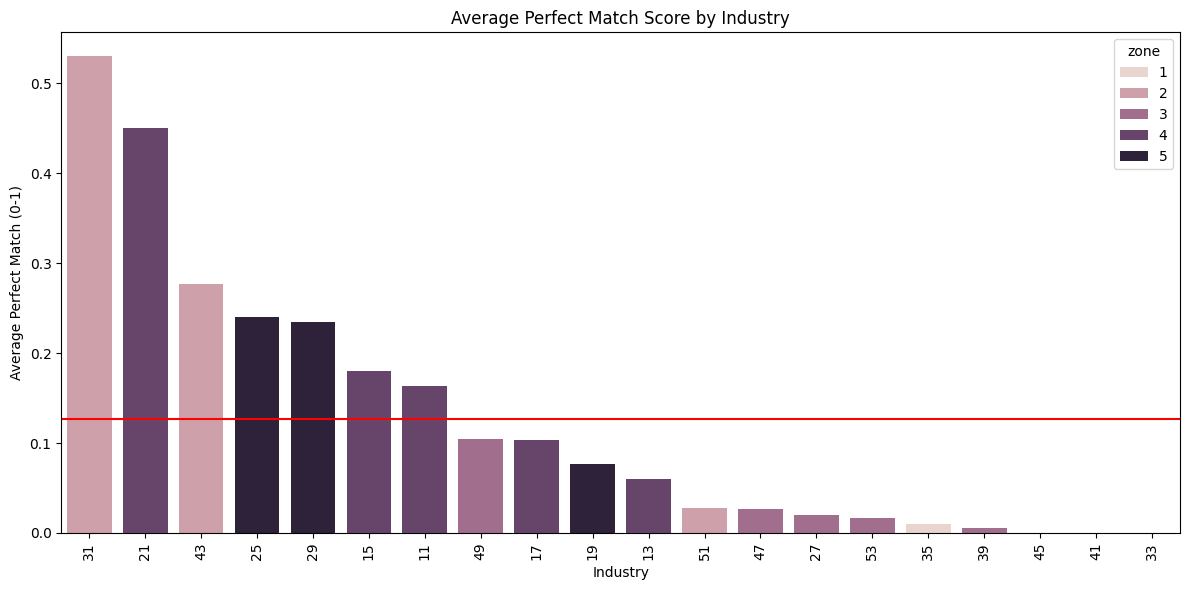

In [22]:
ind_plot = df[["ind", "perfect_match", "related", "zone"]].groupby("ind").agg({"perfect_match":"mean", "related":"mean", "zone":"first"}).reset_index()

# plot perfect match by industry
plt.figure(figsize=(12, 6))
# sns.barplot(data=ind_plot, x="ind", y="perfect_match", order=ind_plot.sort_values("perfect_match", ascending=False)["ind"], hue="zone")
sns.barplot(data=ind_plot, x="ind", y="related", order=ind_plot.sort_values("related", ascending=False)["ind"], hue="zone")
# add a mean score line
plt.axhline(y= ind_plot["related"].mean(), color='r', linestyle='-')
plt.xticks(rotation=90)
plt.title('Average Perfect Match Score by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Perfect Match (0-1)')
plt.tight_layout()
plt.show()


In [23]:
zone_plot = df[["zone", "perfect_match", "related"]].groupby("zone").agg({"perfect_match":"mean", "related":"mean"}).reset_index()
#sort by perfect match
# zone_plot = zone_plot.sort_values("perfect_match", ascending=False)
zone_plot = zone_plot.sort_values("related", ascending=False)

zone_plot

,zone,perfect_match,related
4,5,0.357143,0.198571
3,4,0.220000,0.151333
2,3,0.100000,0.089000
1,2,0.181818,0.086364
0,1,0.000000,0.006667


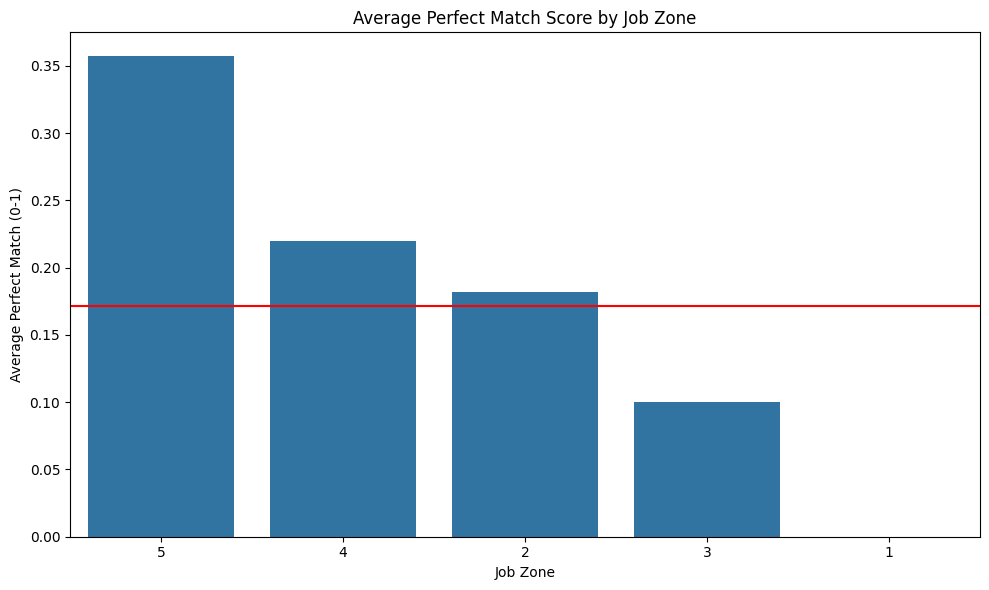

In [24]:
# plot perfect match by zone
plt.figure(figsize=(10, 6))
sns.barplot(data=zone_plot, x="zone", y="perfect_match", order=zone_plot.sort_values("perfect_match", ascending=False)["zone"])
#add a mean score line
plt.axhline(y= zone_plot["perfect_match"].mean(), color='r', linestyle='-')
plt.title('Average Perfect Match Score by Job Zone')
plt.xlabel('Job Zone')
plt.ylabel('Average Perfect Match (0-1)')
plt.tight_layout()
plt.show()


In [25]:
# plot the match score by job zone
sns.boxplot(x='zone', y='perfect_match', data=x)
plt.title('Perfect Match Score by Job Zone')
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'int'>.

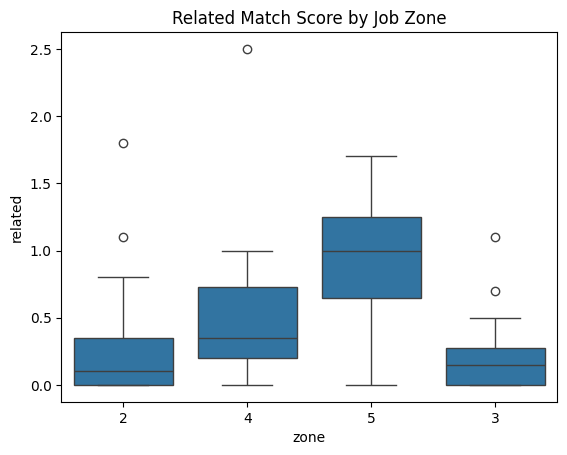

In [153]:
#plot the related score by job zone
sns.boxplot(x='zone', y='related', data=x)
plt.title('Related Match Score by Job Zone')
plt.show()

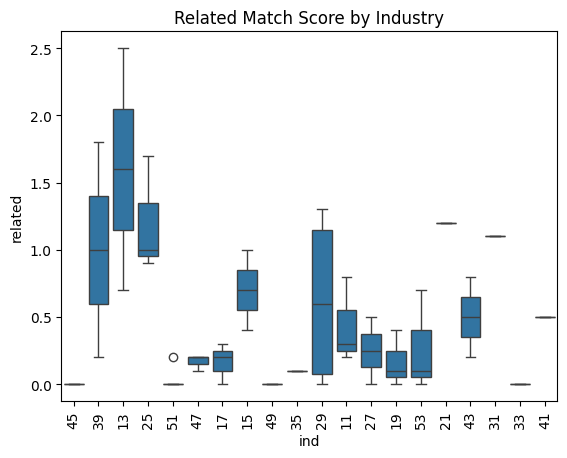

In [154]:
#plot the related score by industry
sns.boxplot(x='ind', y='related', data=x)
plt.title('Related Match Score by Industry')
plt.xticks(rotation=90)
plt.show()


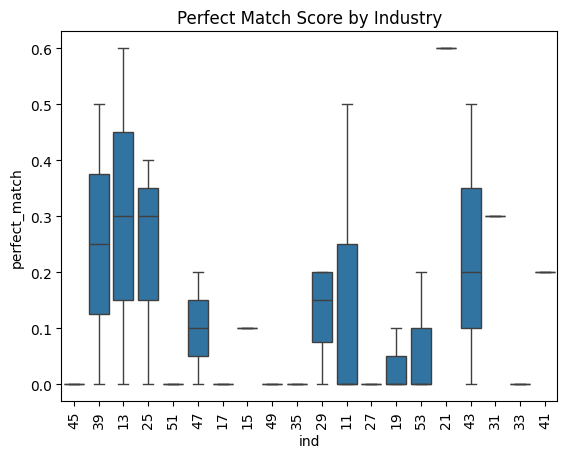

In [155]:
#plot the perfect match by industry
sns.boxplot(x='ind', y='perfect_match', data=x)
plt.title('Perfect Match Score by Industry')
plt.xticks(rotation=90)
plt.show()


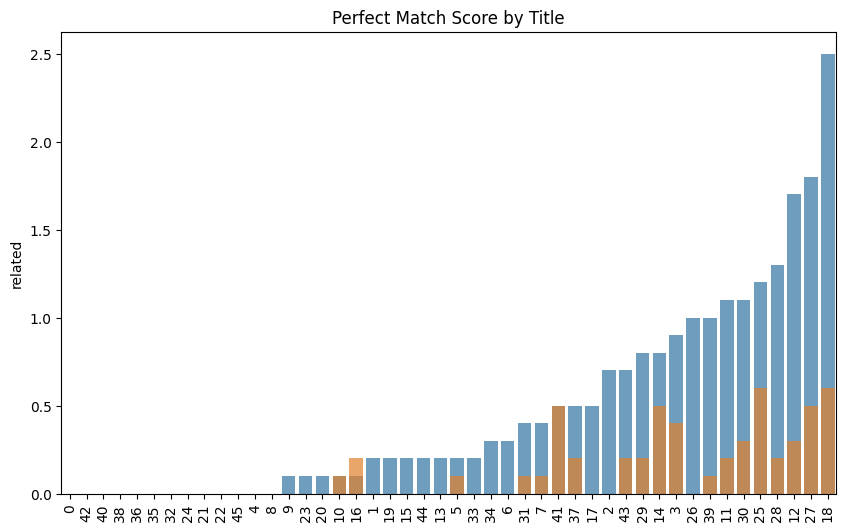

In [156]:
# plot for perfect match by title
plt.figure(figsize=(10, 6))
#x axis is the title, y axis is the score
# make the bars transparent
sns.barplot(x["related"], order=x["related"].sort_values().index, alpha=0.7)
sns.barplot(x["perfect_match"], alpha=0.7)
#plot the related score

#rotate the title
plt.xticks(rotation=90)
#add title
plt.title('Perfect Match Score by Title')
plt.show()


In [ ]:
import numpy as np
from scipy import stats
from statsmodels.stats.power import TTestPower
x = 2
no_prompt_model = model_name[x]
prompt_1_model = model_name[x+1]

# no_prompt = related_array_list[x] 
# prompt_1 = related_array_list[x+1]

no_prompt = perfect_array_list[x]
prompt_1 = perfect_array_list[x+1]

# 2 Sample t-test (H1: Prompt1 > No Prompt)
t_stat, p_value_two_tailed = stats.ttest_ind(prompt_1, no_prompt)
p_value_one_tailed = p_value_two_tailed / 2 if t_stat > 0 else 1 - (p_value_two_tailed / 2)
print(f"Two-Sample t-test ({prompt_1_model} > {no_prompt_model}):")
print(f"t-statistic: {t_stat:.4f}, p-value (one-tailed): {p_value_one_tailed:.8f}")

# Interpretation
alpha = 0.05
if p_value_one_tailed < alpha and np.mean(prompt_1) > np.mean(no_prompt):
    print("Result: Reject H₀. Prompt1 significantly improves scores.")
else:
    print("Result: Fail to reject H₀. Prompt1 does not significantly improve scores.")

# Cohen's d (for paired data)
diffs = prompt_1 - no_prompt
cohen_d = np.mean(diffs) / np.std(diffs, ddof=1)
print(f"Cohen's d: {cohen_d:.4f}")

# Power analysis (paired t-test)
power_analysis = TTestPower()
sample_size = power_analysis.solve_power(effect_size=abs(cohen_d), nobs=None, alpha=alpha, power=0.8, alternative='larger')
print(f"Required sample size (runs): {int(np.ceil(sample_size))} (for power = 0.8, alpha = 0.05)")

Two-Sample t-test (llama_prompt_1 > llama_no_prompt):
t-statistic: 3.1305, p-value (one-tailed): 0.00289013
Result: Reject H₀. Prompt1 significantly improves scores.
Cohen's d: 0.8830
Required sample size (runs): 10 (for power = 0.8, alpha = 0.05)


In [6]:
import pandas as pd
import os
#get jobzone df
jz = pd.read_excel('datasets/job_zone.xlsx')
jz.columns = jz.columns.str.lower().str.replace(" ","_")
jz['industry'] = jz['o*net-soc_code'].str[:2]
jz = jz.drop(labels=['date', 'domain_source','o*net-soc_code'], axis=1)   
jz = jz.rename(columns={'job_zone':'zone'})

full_df = pd.DataFrame()
folder_name = "results/jm1"
json_files = [f for f in os.listdir(folder_name) if f.endswith('.json')]
for file in json_files:
    df = pd.read_json(f"{folder_name}/{file}").dropna()
    #group by title, and agg all the columns start with c_ and r_ by mean
    df = df.groupby("title").agg(lambda x: x.mean() if x.name.startswith(("c_", "r_")) else x.tolist()).reset_index()
    # Rename the columns from r_precision to hits
    df = df.rename(columns={"r_best_fit_precision": "r_best_fit_hits", 
                                  "r_best_and_great_fit_precision": "r_best_and_great_fit_hits", 
                                  "r_all_fit_precision": "r_all_fit_hits"})
    df["model"] = file[:-15]
    full_df = pd.concat([full_df, df], ignore_index=True)

full_df = full_df.merge(jz, how="left", left_on="title", right_on="title")
full_df = full_df.drop(columns=["best_fit","great_fit", "all_fit", "good_fit"])
full_df

,title,c_best_fit_hits,c_best_fit_precision,r_best_fit_hits,r_best_fit_recall,c_best_and_great_fit_hits,c_best_and_great_fit_precision,r_best_and_great_fit_hits,r_best_and_great_fit_recall,c_all_fit_hits,c_all_fit_precision,r_all_fit_hits,r_all_fit_recall,model,zone,industry
0,"Art, Drama, and Music Teachers, Postsecondary",0.0,0.000000,0.8,0.10,0.0,0.000000,0.8,0.16,0.0,0.000000,1.0,0.39,deepseek_benchmark,5,25
1,Bill and Account Collectors,0.0,0.000000,0.0,0.00,0.0,0.000000,0.2,0.02,0.0,0.000000,0.5,0.06,deepseek_benchmark,2,43
2,Billing and Posting Clerks,0.0,0.000000,0.4,0.13,0.0,0.000000,0.7,0.26,0.0,0.000000,0.8,0.27,deepseek_benchmark,3,43
3,Bioinformatics Scientists,0.0,0.000000,0.1,0.02,0.0,0.000000,0.1,0.03,0.0,0.000000,0.1,0.03,deepseek_benchmark,5,19
4,Business Intelligence Analysts,0.0,0.000000,0.1,0.02,0.0,0.000000,0.1,0.02,0.0,0.000000,0.1,0.02,deepseek_benchmark,4,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Sustainability Specialists,0.0,0.000000,0.3,0.05,0.0,0.000000,0.4,0.09,0.0,0.000000,0.4,0.09,mistral_persona,4,13
272,Talent Directors,1.0,0.098322,0.8,0.12,1.0,0.029224,1.0,0.19,1.0,0.018099,1.0,0.23,mistral_persona,4,27
273,Team Assemblers,0.8,0.003747,0.6,0.14,1.0,0.002851,0.8,0.23,1.0,0.002748,0.8,0.23,mistral_persona,2,51
274,Timing Device Assemblers and Adjusters,0.0,0.000000,0.0,0.00,0.0,0.000000,0.4,0.07,0.0,0.000000,0.4,0.07,mistral_persona,2,51


In [47]:
import pandas as pd
import os
import numpy as np
#get jobzone df
jz = pd.read_excel('datasets/job_zone.xlsx')
jz.columns = jz.columns.str.lower().str.replace(" ","_")
jz['industry'] = jz['o*net-soc_code'].str[:2]
jz = jz.drop(labels=['date', 'domain_source','o*net-soc_code'], axis=1)   
jz = jz.rename(columns={'job_zone':'zone'})

full_df = pd.DataFrame()
folder_name = "results/jm1"
json_files = [f for f in os.listdir(folder_name) if f.endswith('.json')]
for file in json_files:
    df = pd.read_json(f"{folder_name}/{file}").dropna()
    # Rename the columns from r_precision to hits
    df = df.rename(columns={"r_best_fit_precision": "r_best_fit_hits", 
                                  "r_best_and_great_fit_precision": "r_best_and_great_fit_hits", 
                                  "r_all_fit_precision": "r_all_fit_hits"})
    df["model"] = file[:-15]
    full_df = pd.concat([full_df, df], ignore_index=True)

full_df = full_df.merge(jz, how="left", left_on="title", right_on="title")
full_df = full_df.drop(columns=["best_fit","great_fit", "all_fit", "good_fit"])

test = full_df[["title", "c_all_fit_hits", "c_all_fit_precision", "r_all_fit_hits", "r_all_fit_recall", "model", "zone", "industry"]]
#split the model by "_"
test["setup"] = test["model"].str.split("_").str[1]
test["model"] = test["model"].str.split("_").str[0]  # get the model name
# rename the columns

# both deepseek benchmark and persona

# Assign trial numbers in a repeating sequence
test["trial"] = np.tile(np.repeat(np.arange(1, 11), 46), 6)


C:\Users\godfr\AppData\Local\Temp\ipykernel_12272\985534763.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["setup"] = test["model"].str.split("_").str[1]
C:\Users\godfr\AppData\Local\Temp\ipykernel_12272\985534763.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["model"] = test["model"].str.split("_").str[0]  # get the model name
C:\Users\godfr\AppData\Local\Temp\ipykernel_12272\985534763.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [50]:
import pandas as pd
import numpy as np
import statsmodels.api as sm  # Import statsmodels.api as sm
from statsmodels.genmod.families import Binomial, Gamma


# Function to run GLM for a model
def analyze_model(model_name, metric, family):
    df_model = test[test["model"] == model_name]
    if isinstance(family, Binomial):
        formula = f"{metric} ~ setup * title"
        # Add interaction terms for setup with title, zone, and industry

        model = sm.GLM.from_formula(formula, data=df_model, family=family).fit()
    else:  # Gamma
        df_model[f"{metric}_adj"] = df_model[metric] + 0.001  # Handle zeros
        formula = f"{metric}_adj ~ setup * title"
        model = sm.GLM.from_formula(formula, data=df_model, family=family).fit()
    return model

# Define families with link functions
binomial_family = sm.families.Binomial()  # Default logit link
gamma_family = sm.families.Gamma(link=sm.families.links.log())  # Instantiate the log link

# Analyze each model
models = ["deepseek", "llama3.2", "mistral"]
metrics = ["c_all_fit_hits", "r_all_fit_hits", "c_all_fit_precision", "r_all_fit_recall"]
families = [binomial_family, binomial_family, gamma_family, gamma_family]

for model_name in models:
    print(f"\n{model_name.upper()} Analysis:")
    for metric, family in zip(metrics, families):
        model = analyze_model(model_name, metric, family)
        print(f"{metric}:")
        print(model.summary().tables[1])  # Coefficients table

c:\Users\godfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(



DEEPSEEK Analysis:
c_all_fit_hits:
                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                    -26.5661   1.13e+05     -0.000      1.000   -2.21e+05    2.21e+05
setup[T.persona]                                                                                            7.063e-05   1.59e+05   4.43e-10      1.000   -3.12e+05    3.12e+05
title[T.Bill and Account Collectors]                                                                       -5.055e-06   1.59e+05  -3.17e-11      1.000   -3.12e+05    3.12e+05
title[T.Billing and Posting Clerks]                                                      

C:\Users\godfr\AppData\Local\Temp\ipykernel_12272\1560665927.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[f"{metric}_adj"] = df_model[metric] + 0.001  # Handle zeros


c_all_fit_precision:
                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                     -6.9078      0.211    -32.812      0.000      -7.320      -6.495
setup[T.persona]                                                                                            4.146e-14      0.298   1.39e-13      1.000      -0.584       0.584
title[T.Bill and Account Collectors]                                                                        1.844e-14      0.298   6.19e-14      1.000      -0.584       0.584
title[T.Billing and Posting Clerks]                                                                     

C:\Users\godfr\AppData\Local\Temp\ipykernel_12272\1560665927.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[f"{metric}_adj"] = df_model[metric] + 0.001  # Handle zeros


r_all_fit_recall:
                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                     -0.9390      0.486     -1.933      0.053      -1.891       0.013
setup[T.persona]                                                                                               0.0253      0.687      0.037      0.971      -1.322       1.372
title[T.Bill and Account Collectors]                                                                          -1.8578      0.687     -2.704      0.007      -3.205      -0.511
title[T.Billing and Posting Clerks]                                                                        

C:\Users\godfr\AppData\Local\Temp\ipykernel_12272\1560665927.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[f"{metric}_adj"] = df_model[metric] + 0.001  # Handle zeros


c_all_fit_precision:
                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                     -6.9078      0.184    -37.474      0.000      -7.269      -6.546
setup[T.persona]                                                                                           -1.715e-14      0.261  -6.58e-14      1.000      -0.511       0.511
title[T.Bill and Account Collectors]                                                                       -8.411e-15      0.261  -3.23e-14      1.000      -0.511       0.511
title[T.Billing and Posting Clerks]                                                                     

C:\Users\godfr\AppData\Local\Temp\ipykernel_12272\1560665927.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[f"{metric}_adj"] = df_model[metric] + 0.001  # Handle zeros


r_all_fit_recall:
                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                     -0.8187      0.419     -1.952      0.051      -1.641       0.003
setup[T.persona]                                                                                              -0.0951      0.593     -0.160      0.873      -1.257       1.067
title[T.Bill and Account Collectors]                                                                          -0.4157      0.593     -0.701      0.483      -1.578       0.747
title[T.Billing and Posting Clerks]                                                                        

C:\Users\godfr\AppData\Local\Temp\ipykernel_12272\1560665927.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[f"{metric}_adj"] = df_model[metric] + 0.001  # Handle zeros


c_all_fit_precision:
                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                     -6.9078      0.158    -43.711      0.000      -7.217      -6.598
setup[T.persona]                                                                                           -4.482e-15      0.223  -2.01e-14      1.000      -0.438       0.438
title[T.Bill and Account Collectors]                                                                       -4.395e-14      0.223  -1.97e-13      1.000      -0.438       0.438
title[T.Billing and Posting Clerks]                                                                     

C:\Users\godfr\AppData\Local\Temp\ipykernel_12272\1560665927.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[f"{metric}_adj"] = df_model[metric] + 0.001  # Handle zeros


r_all_fit_recall:
                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                     -0.9138      0.449     -2.037      0.042      -1.793      -0.035
setup[T.persona]                                                                                            3.227e-14      0.634   5.09e-14      1.000      -1.243       1.243
title[T.Bill and Account Collectors]                                                                          -2.5600      0.634     -4.036      0.000      -3.803      -1.317
title[T.Billing and Posting Clerks]                                                                        

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot c_hit rate and r_hit rate
# sns.histplot(data=df2, x="c_best_fit_hits", bins=20, kde=True, label="correct best fit hit rate") 
sns.histplot(data=df2, x="c_best_and_great_fit_hits", bins = 20, kde=True, label="correct best/ great fit hit rate")
sns.histplot(data=df2, x="c_all_fit_hits", bins = 20, kde=True, label="correct all fit hit rate")

plt.xlabel("Hit Rate")
plt.yscale("log")
plt.legend()
plt.title("Hit Rate Distribution")

NameError: name 'df2' is not defined

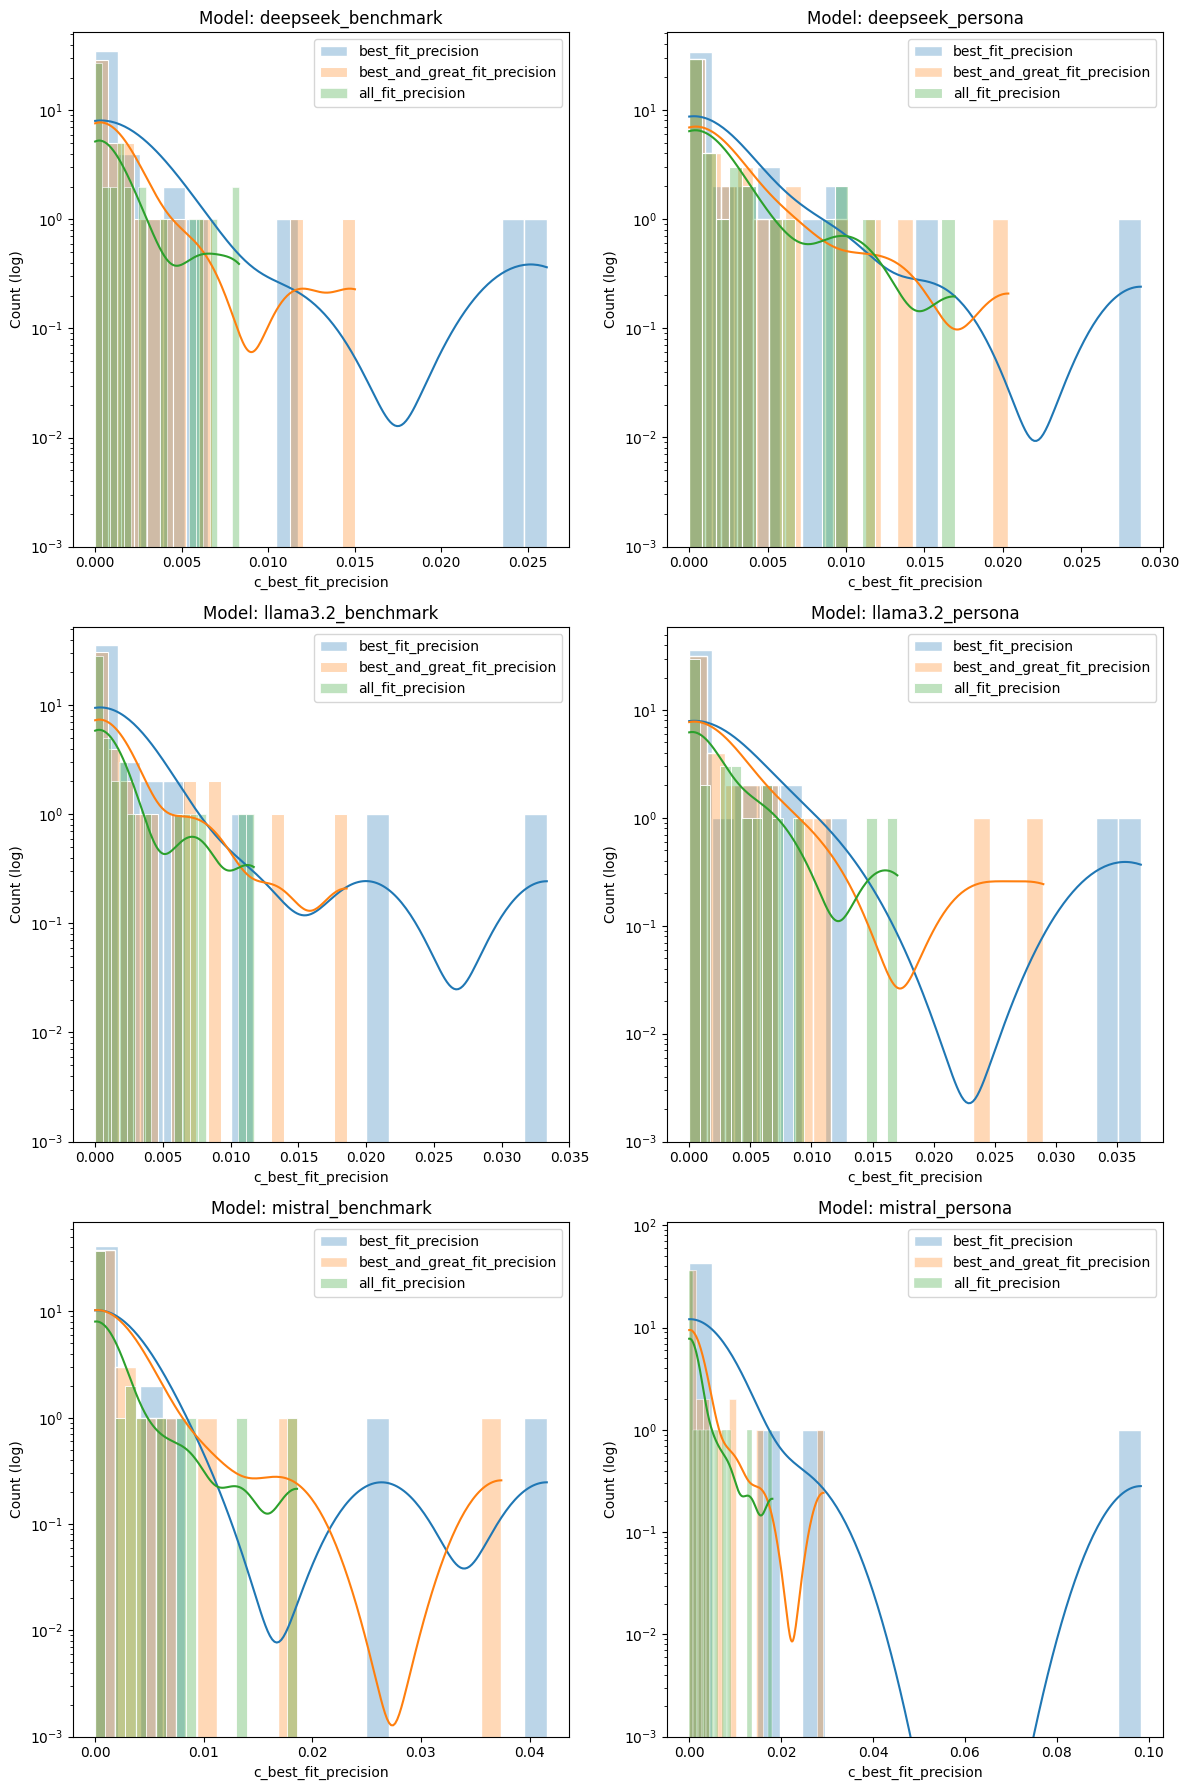

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
x = 0  # Index of the first model
model_1 = full_df[full_df["model"] == full_df["model"].unique()[x]]
model_2 = full_df[full_df["model"] == full_df["model"].unique()[x + 1]]
model_3 = full_df[full_df["model"] == full_df["model"].unique()[x + 2]]
model_4 = full_df[full_df["model"] == full_df["model"].unique()[x + 3]]
model_5 = full_df[full_df["model"] == full_df["model"].unique()[x + 4]]
model_6 = full_df[full_df["model"] == full_df["model"].unique()[x + 5]]

plt.figure(figsize=(12, 18))

# Plot for Model 1
plt.subplot(3, 2, 1)
sns.histplot(data=model_1["c_best_fit_precision"], bins=20, kde=True, label="best_fit_precision", edgecolor="white", alpha=0.3)
sns.histplot(data=model_1["c_best_and_great_fit_precision"], bins=20, kde=True, label="best_and_great_fit_precision", edgecolor="white", alpha=0.3)
sns.histplot(data=model_1["c_all_fit_precision"], bins=20, kde=True, label="all_fit_precision", edgecolor="white", alpha=0.3)
plt.yscale('log')
plt.ylim(bottom=0.001)
plt.ylabel("Count (log)")
plt.title(f"Model: {full_df['model'].unique()[x]}")
plt.legend()

# Plot for Model 2
plt.subplot(3, 2, 2)
sns.histplot(data=model_2["c_best_fit_precision"], bins=20, kde=True, label="best_fit_precision", edgecolor="white", alpha=0.3)
sns.histplot(data=model_2["c_best_and_great_fit_precision"], bins=20, kde=True, label="best_and_great_fit_precision", edgecolor="white", alpha=0.3)
sns.histplot(data=model_2["c_all_fit_precision"], bins=20, kde=True, label="all_fit_precision", edgecolor="white", alpha=0.3)
plt.yscale('log')
plt.ylim(bottom=0.001)
plt.ylabel("Count (log)")
plt.title(f"Model: {full_df['model'].unique()[x + 1]}")
plt.legend()

# Plot for Model 3
plt.subplot(3, 2, 3)
sns.histplot(data=model_3["c_best_fit_precision"], bins=20, kde=True, label="best_fit_precision", edgecolor="white", alpha=0.3)
sns.histplot(data=model_3["c_best_and_great_fit_precision"], bins=20, kde=True, label="best_and_great_fit_precision", edgecolor="white", alpha=0.3)
sns.histplot(data=model_3["c_all_fit_precision"], bins=20, kde=True, label="all_fit_precision", edgecolor="white", alpha=0.3)
plt.yscale('log')
plt.ylim(bottom=0.001)
plt.ylabel("Count (log)")
plt.title(f"Model: {full_df['model'].unique()[x + 2]}")
plt.legend()

# Plot for Model 4
plt.subplot(3, 2, 4)
sns.histplot(data=model_4["c_best_fit_precision"], bins=20, kde=True, label="best_fit_precision", edgecolor="white", alpha=0.3)
sns.histplot(data=model_4["c_best_and_great_fit_precision"], bins=20, kde=True, label="best_and_great_fit_precision", edgecolor="white", alpha=0.3)
sns.histplot(data=model_4["c_all_fit_precision"], bins=20, kde=True, label="all_fit_precision", edgecolor="white", alpha=0.3)
plt.yscale('log')
plt.ylim(bottom=0.001)
plt.ylabel("Count (log)")
plt.title(f"Model: {full_df['model'].unique()[x + 3]}")
plt.legend()

# Plot for Model 5
plt.subplot(3, 2, 5)
sns.histplot(data=model_5["c_best_fit_precision"], bins=20, kde=True, label="best_fit_precision", edgecolor="white", alpha=0.3)
sns.histplot(data=model_5["c_best_and_great_fit_precision"], bins=20, kde=True, label="best_and_great_fit_precision", edgecolor="white", alpha=0.3)
sns.histplot(data=model_5["c_all_fit_precision"], bins=20, kde=True, label="all_fit_precision", edgecolor="white", alpha=0.3)
plt.yscale('log')
plt.ylim(bottom=0.001)
plt.ylabel("Count (log)")
plt.title(f"Model: {full_df['model'].unique()[x + 4]}")
plt.legend()

# Plot for Model 6
plt.subplot(3, 2, 6)
sns.histplot(data=model_6["c_best_fit_precision"], bins=20, kde=True, label="best_fit_precision", edgecolor="white", alpha=0.3)
sns.histplot(data=model_6["c_best_and_great_fit_precision"], bins=20, kde=True, label="best_and_great_fit_precision", edgecolor="white", alpha=0.3)
sns.histplot(data=model_6["c_all_fit_precision"], bins=20, kde=True, label="all_fit_precision", edgecolor="white", alpha=0.3)
plt.yscale('log')
plt.ylim(bottom=0.001)
plt.ylabel("Count (log)")
plt.title(f"Model: {full_df['model'].unique()[x + 5]}")
plt.legend()

plt.tight_layout()
plt.show()


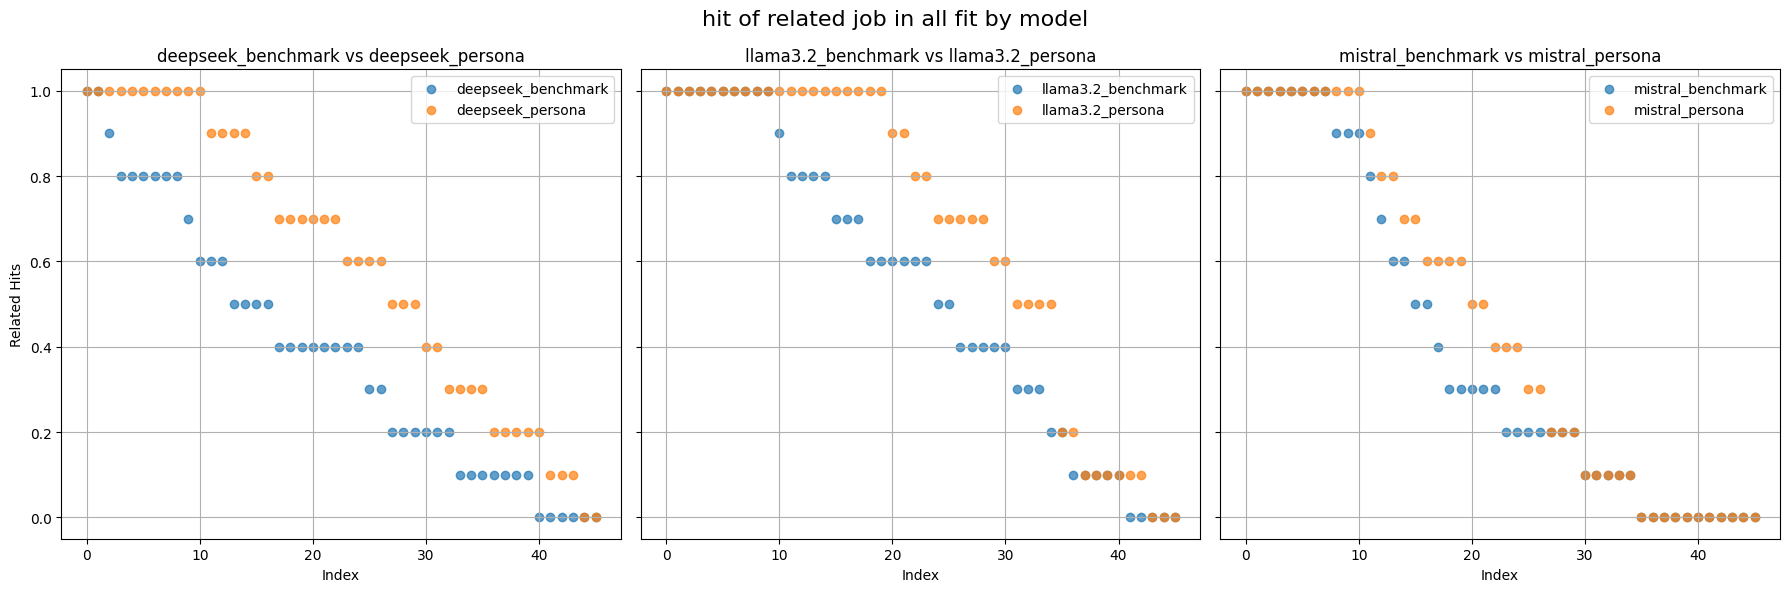

In [14]:
import numpy as np
import matplotlib.pyplot as plt

models = full_df["model"].unique()

# Prepare data for the three models
benchmark_1 = full_df[full_df["model"] == models[0]].sort_values(by="r_all_fit_hits", ascending=False).reset_index(drop=True)
benchmark_1['index'] = np.arange(len(benchmark_1))

persona_1 = full_df[full_df["model"] == models[1]].sort_values(by="r_all_fit_hits", ascending=False).reset_index(drop=True)
persona_1['index'] = np.arange(len(persona_1))

benchmark_2 = full_df[full_df["model"] == models[2]].sort_values(by="r_all_fit_hits", ascending=False).reset_index(drop=True)
benchmark_2['index'] = np.arange(len(benchmark_2))

persona_2 = full_df[full_df["model"] == models[3]].sort_values(by="r_all_fit_hits", ascending=False).reset_index(drop=True)
persona_2['index'] = np.arange(len(persona_2))

benchmark_3 = full_df[full_df["model"] == models[4]].sort_values(by="r_all_fit_hits", ascending=False).reset_index(drop=True)
benchmark_3['index'] = np.arange(len(benchmark_3))

persona_3 = full_df[full_df["model"] == models[5]].sort_values(by="r_all_fit_hits", ascending=False).reset_index(drop=True)
persona_3['index'] = np.arange(len(persona_3))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
#add a title to the figure
fig.suptitle("hit of related job in all fit by model", fontsize=16)

# Plot for Model 1
axes[0].scatter(benchmark_1["index"], benchmark_1["r_all_fit_hits"], label=models[x], alpha=0.7)
axes[0].scatter(persona_1["index"], persona_1["r_all_fit_hits"], label=models[1], alpha=0.7)
axes[0].set_title(f"{models[x]} vs {models[1]}")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Related Hits")
axes[0].legend()
axes[0].grid(True)

# Plot for Model 2
axes[1].scatter(benchmark_2["index"], benchmark_2["r_all_fit_hits"], label=models[2], alpha=0.7)
axes[1].scatter(persona_2["index"], persona_2["r_all_fit_hits"], label=models[3], alpha=0.7)
axes[1].set_title(f"{models[2]} vs {models[3]}")
axes[1].set_xlabel("Index")
axes[1].legend()
axes[1].grid(True)

# Plot for Model 3
axes[2].scatter(benchmark_3["index"], benchmark_3["r_all_fit_hits"], label=models[4], alpha=0.7)
axes[2].scatter(persona_3["index"], persona_3["r_all_fit_hits"], label=models[5], alpha=0.7)
axes[2].set_title(f"{models[4]} vs {models[5]}")
axes[2].set_xlabel("Index")
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()

plt.show()



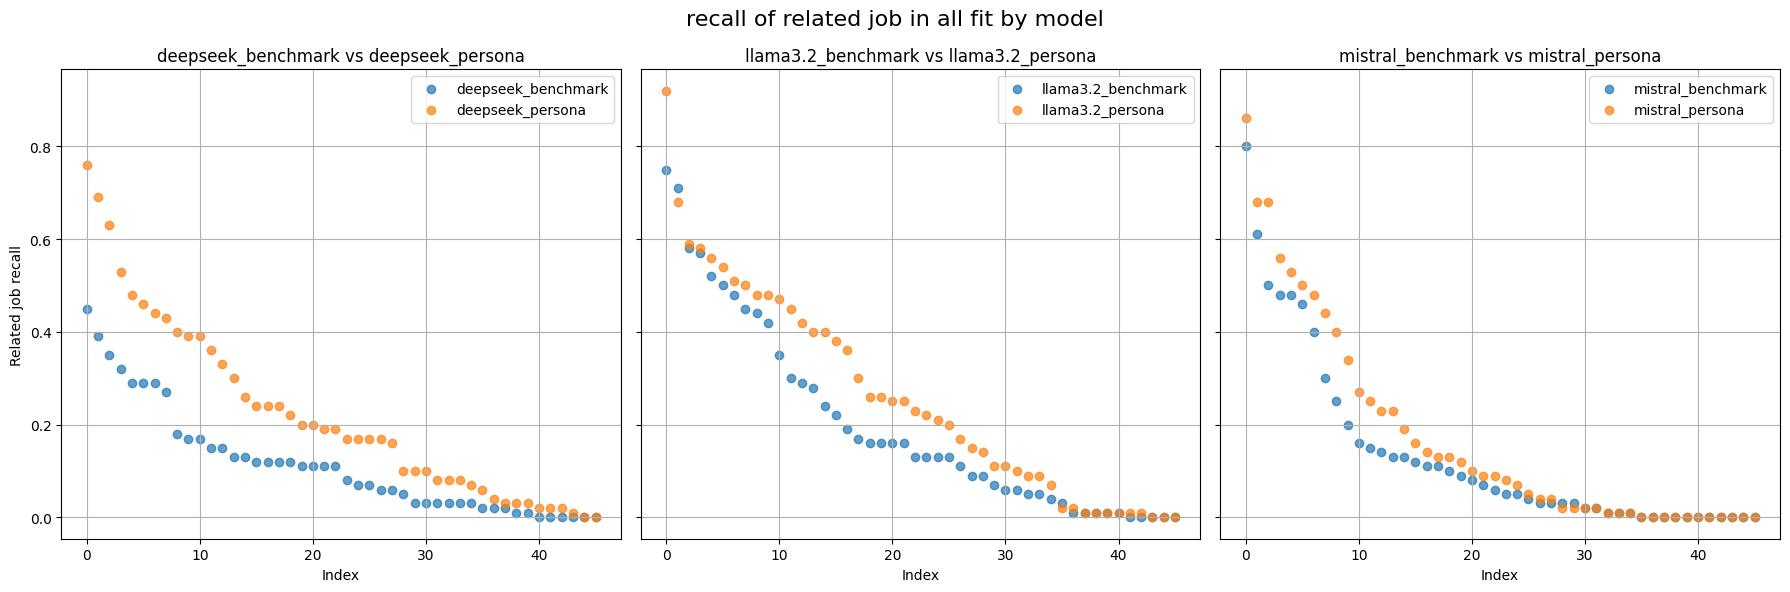

In [20]:
import numpy as np
import matplotlib.pyplot as plt

models = full_df["model"].unique()

# Prepare data for the three models
benchmark_1 = full_df[full_df["model"] == models[0]].sort_values(by="r_all_fit_recall", ascending=False).reset_index(drop=True)
benchmark_1['index'] = np.arange(len(benchmark_1))

persona_1 = full_df[full_df["model"] == models[1]].sort_values(by="r_all_fit_recall", ascending=False).reset_index(drop=True)
persona_1['index'] = np.arange(len(persona_1))

benchmark_2 = full_df[full_df["model"] == models[2]].sort_values(by="r_all_fit_recall", ascending=False).reset_index(drop=True)
benchmark_2['index'] = np.arange(len(benchmark_2))

persona_2 = full_df[full_df["model"] == models[3]].sort_values(by="r_all_fit_recall", ascending=False).reset_index(drop=True)
persona_2['index'] = np.arange(len(persona_2))

benchmark_3 = full_df[full_df["model"] == models[4]].sort_values(by="r_all_fit_recall", ascending=False).reset_index(drop=True)
benchmark_3['index'] = np.arange(len(benchmark_3))

persona_3 = full_df[full_df["model"] == models[5]].sort_values(by="r_all_fit_recall", ascending=False).reset_index(drop=True)
persona_3['index'] = np.arange(len(persona_3))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
#add a title to the figure
fig.suptitle("recall of related job in all fit by model", fontsize=16)

# Plot for Model 1
axes[0].scatter(benchmark_1["index"], benchmark_1["r_all_fit_recall"], label=models[x], alpha=0.7)
axes[0].scatter(persona_1["index"], persona_1["r_all_fit_recall"], label=models[1], alpha=0.7)
axes[0].set_title(f"{models[x]} vs {models[1]}")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Related job recall")
axes[0].legend()
axes[0].grid(True)

# Plot for Model 2
axes[1].scatter(benchmark_2["index"], benchmark_2["r_all_fit_recall"], label=models[2], alpha=0.7)
axes[1].scatter(persona_2["index"], persona_2["r_all_fit_recall"], label=models[3], alpha=0.7)
axes[1].set_title(f"{models[2]} vs {models[3]}")
axes[1].set_xlabel("Index")
axes[1].legend()
axes[1].grid(True)

# Plot for Model 3
axes[2].scatter(benchmark_3["index"], benchmark_3["r_all_fit_recall"], label=models[4], alpha=0.7)
axes[2].scatter(persona_3["index"], persona_3["r_all_fit_recall"], label=models[5], alpha=0.7)
axes[2].set_title(f"{models[4]} vs {models[5]}")
axes[2].set_xlabel("Index")
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()

plt.show()



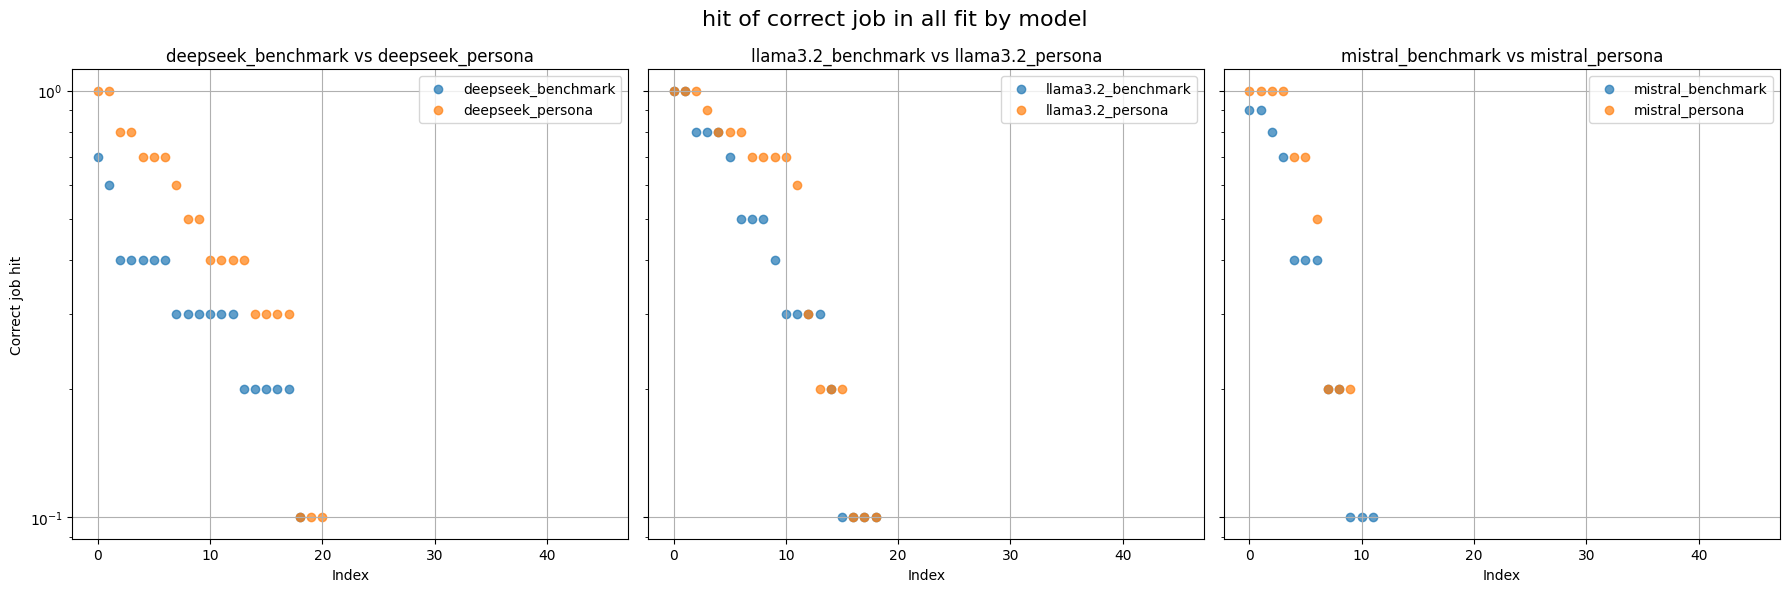

In [27]:
import numpy as np
import matplotlib.pyplot as plt

models = full_df["model"].unique()

# Prepare data for the three models
benchmark_1 = full_df[full_df["model"] == models[0]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
benchmark_1['index'] = np.arange(len(benchmark_1))

persona_1 = full_df[full_df["model"] == models[1]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
persona_1['index'] = np.arange(len(persona_1))

benchmark_2 = full_df[full_df["model"] == models[2]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
benchmark_2['index'] = np.arange(len(benchmark_2))

persona_2 = full_df[full_df["model"] == models[3]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
persona_2['index'] = np.arange(len(persona_2))

benchmark_3 = full_df[full_df["model"] == models[4]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
benchmark_3['index'] = np.arange(len(benchmark_3))

persona_3 = full_df[full_df["model"] == models[5]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
persona_3['index'] = np.arange(len(persona_3))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
#add a title to the figure
fig.suptitle("hit of correct job in all fit by model", fontsize=16)

# Plot for Model 1
axes[0].scatter(benchmark_1["index"], benchmark_1["c_all_fit_hits"], label=models[x], alpha=0.7)
axes[0].scatter(persona_1["index"], persona_1["c_all_fit_hits"], label=models[1], alpha=0.7)
axes[0].set_title(f"{models[x]} vs {models[1]}")
axes[0].set_xlabel("Index")
axes[0].set_yscale("log")
axes[0].set_ylabel("Correct job hit")
axes[0].legend()
axes[0].grid(True)

# Plot for Model 2
axes[1].scatter(benchmark_2["index"], benchmark_2["c_all_fit_hits"], label=models[2], alpha=0.7)
axes[1].scatter(persona_2["index"], persona_2["c_all_fit_hits"], label=models[3], alpha=0.7)
axes[1].set_title(f"{models[2]} vs {models[3]}")
axes[1].set_xlabel("Index")
axes[1].legend()
axes[1].grid(True)

# Plot for Model 3
axes[2].scatter(benchmark_3["index"], benchmark_3["c_all_fit_hits"], label=models[4], alpha=0.7)
axes[2].scatter(persona_3["index"], persona_3["c_all_fit_hits"], label=models[5], alpha=0.7)
axes[2].set_title(f"{models[4]} vs {models[5]}")
axes[2].set_xlabel("Index")
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()

plt.show()



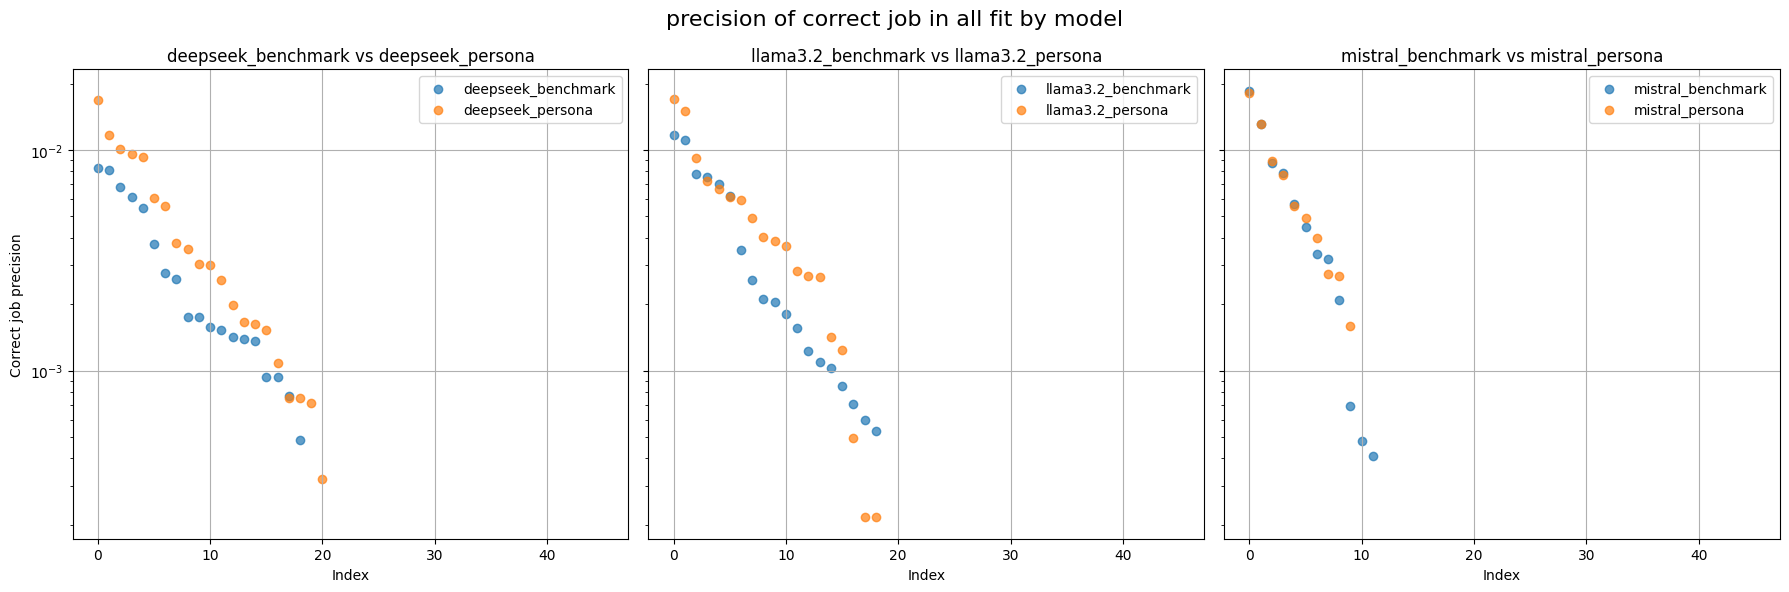

In [29]:
import numpy as np
import matplotlib.pyplot as plt

models = full_df["model"].unique()

# Prepare data for the three models
benchmark_1 = full_df[full_df["model"] == models[0]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
benchmark_1['index'] = np.arange(len(benchmark_1))

persona_1 = full_df[full_df["model"] == models[1]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
persona_1['index'] = np.arange(len(persona_1))

benchmark_2 = full_df[full_df["model"] == models[2]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
benchmark_2['index'] = np.arange(len(benchmark_2))

persona_2 = full_df[full_df["model"] == models[3]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
persona_2['index'] = np.arange(len(persona_2))

benchmark_3 = full_df[full_df["model"] == models[4]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
benchmark_3['index'] = np.arange(len(benchmark_3))

persona_3 = full_df[full_df["model"] == models[5]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
persona_3['index'] = np.arange(len(persona_3))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
#add a title to the figure
fig.suptitle("precision of correct job in all fit by model", fontsize=16)

# Plot for Model 1
axes[0].scatter(benchmark_1["index"], benchmark_1["c_all_fit_precision"], label=models[x], alpha=0.7)
axes[0].scatter(persona_1["index"], persona_1["c_all_fit_precision"], label=models[1], alpha=0.7)
axes[0].set_title(f"{models[x]} vs {models[1]}")
axes[0].set_xlabel("Index")
axes[0].set_yscale("log")
axes[0].set_ylabel("Correct job precision")
axes[0].legend()
axes[0].grid(True)

# Plot for Model 2
axes[1].scatter(benchmark_2["index"], benchmark_2["c_all_fit_precision"], label=models[2], alpha=0.7)
axes[1].scatter(persona_2["index"], persona_2["c_all_fit_precision"], label=models[3], alpha=0.7)
axes[1].set_title(f"{models[2]} vs {models[3]}")
axes[1].set_xlabel("Index")
axes[1].legend()
axes[1].grid(True)

# Plot for Model 3
axes[2].scatter(benchmark_3["index"], benchmark_3["c_all_fit_precision"], label=models[4], alpha=0.7)
axes[2].scatter(persona_3["index"], persona_3["c_all_fit_precision"], label=models[5], alpha=0.7)
axes[2].set_title(f"{models[4]} vs {models[5]}")
axes[2].set_xlabel("Index")
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()

plt.show()



### plot all metrics in industry

In [35]:
ind_df = full_df.copy()
ind_df = ind_df.drop(columns=["title", "zone"])
#group by ind and model, and agg all the columns start with c_ and r_ by mean, zone by first
ind_df = ind_df.groupby(["model", "ind"]).agg(lambda x: x.mean() if x.name.startswith(("c_", "r_",)) else x.tolist()).reset_index()
ind_df

,model,ind,c_best_fit_hits,c_best_fit_precision,r_best_fit_hits,r_best_fit_recall,c_best_and_great_fit_hits,c_best_and_great_fit_precision,r_best_and_great_fit_hits,r_best_and_great_fit_recall,c_all_fit_hits,c_all_fit_precision,r_all_fit_hits,r_all_fit_recall
0,deepseek_benchmark,11,0.133333,0.008081,0.233333,0.066667,0.2,0.003907,0.533333,0.190000,0.2,0.002714,0.666667,0.210000
1,deepseek_benchmark,13,0.150000,0.002375,0.150000,0.045000,0.2,0.001917,0.250000,0.080000,0.2,0.001762,0.250000,0.080000
2,deepseek_benchmark,15,0.000000,0.000000,0.050000,0.010000,0.0,0.000000,0.050000,0.010000,0.0,0.000000,0.100000,0.020000
3,deepseek_benchmark,17,0.100000,0.000332,0.133333,0.026667,0.2,0.000634,0.233333,0.046667,0.2,0.000614,0.233333,0.046667
4,deepseek_benchmark,19,0.000000,0.000000,0.066667,0.010000,0.0,0.000000,0.100000,0.016667,0.0,0.000000,0.100000,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,mistral_persona,45,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
116,mistral_persona,47,0.000000,0.000000,0.100000,0.026667,0.0,0.000000,0.300000,0.076667,0.0,0.000000,0.300000,0.076667
117,mistral_persona,49,0.000000,0.000000,0.100000,0.035000,0.0,0.000000,0.450000,0.105000,0.0,0.000000,0.450000,0.105000
118,mistral_persona,51,0.160000,0.000749,0.120000,0.028000,0.2,0.000570,0.240000,0.060000,0.2,0.000550,0.240000,0.060000


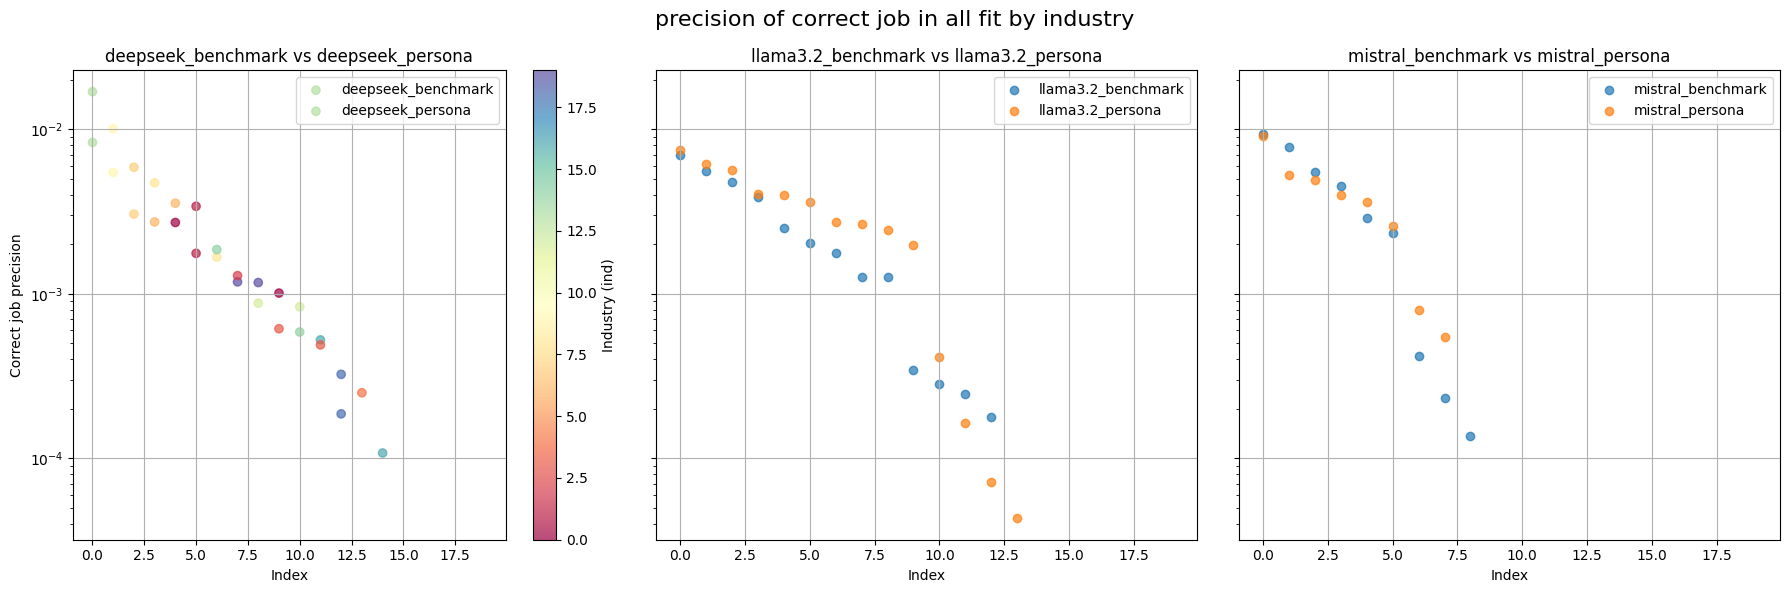

In [40]:
import numpy as np
import matplotlib.pyplot as plt

models = ind_df["model"].unique()

# Prepare data for the three models
benchmark_1 = ind_df[ind_df["model"] == models[0]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
benchmark_1['index'] = np.arange(len(benchmark_1))

persona_1 = ind_df[ind_df["model"] == models[1]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
persona_1['index'] = np.arange(len(persona_1))

benchmark_2 = ind_df[ind_df["model"] == models[2]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
benchmark_2['index'] = np.arange(len(benchmark_2))

persona_2 = ind_df[ind_df["model"] == models[3]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
persona_2['index'] = np.arange(len(persona_2))

benchmark_3 = ind_df[ind_df["model"] == models[4]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
benchmark_3['index'] = np.arange(len(benchmark_3))

persona_3 = ind_df[ind_df["model"] == models[5]].sort_values(by="c_all_fit_precision", ascending=False).reset_index(drop=True)
persona_3['index'] = np.arange(len(persona_3))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
#add a title to the figure
fig.suptitle("precision of correct job in all fit by industry", fontsize=16)

# Plot for Model 1
# Map colors based on the 'ind' column
colors_benchmark_1 = benchmark_1["ind"].astype("category").cat.codes
colors_persona_1 = persona_1["ind"].astype("category").cat.codes

# Scatter plot with colors
scatter1 = axes[0].scatter(benchmark_1["index"], benchmark_1["c_all_fit_precision"], c=colors_benchmark_1, label=models[x], alpha=0.7, cmap="Spectral")
scatter2 = axes[0].scatter(persona_1["index"], persona_1["c_all_fit_precision"], c=colors_persona_1, label=models[1], alpha=0.7, cmap="Spectral")

# Add a colorbar for the 'ind' column
plt.colorbar(scatter1, ax=axes[0], label="Industry (ind)")
axes[0].set_title(f"{models[x]} vs {models[1]}")
axes[0].set_xlabel("Index")
axes[0].set_yscale("log")
axes[0].set_ylabel("Correct job precision")
axes[0].legend()
axes[0].grid(True)

# Plot for Model 2
axes[1].scatter(benchmark_2["index"], benchmark_2["c_all_fit_precision"], label=models[2], alpha=0.7)
axes[1].scatter(persona_2["index"], persona_2["c_all_fit_precision"], label=models[3], alpha=0.7)
axes[1].set_title(f"{models[2]} vs {models[3]}")
axes[1].set_xlabel("Index")
axes[1].legend()
axes[1].grid(True)

# Plot for Model 3
axes[2].scatter(benchmark_3["index"], benchmark_3["c_all_fit_precision"], label=models[4], alpha=0.7)
axes[2].scatter(persona_3["index"], persona_3["c_all_fit_precision"], label=models[5], alpha=0.7)
axes[2].set_title(f"{models[4]} vs {models[5]}")
axes[2].set_xlabel("Index")
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()

plt.show()



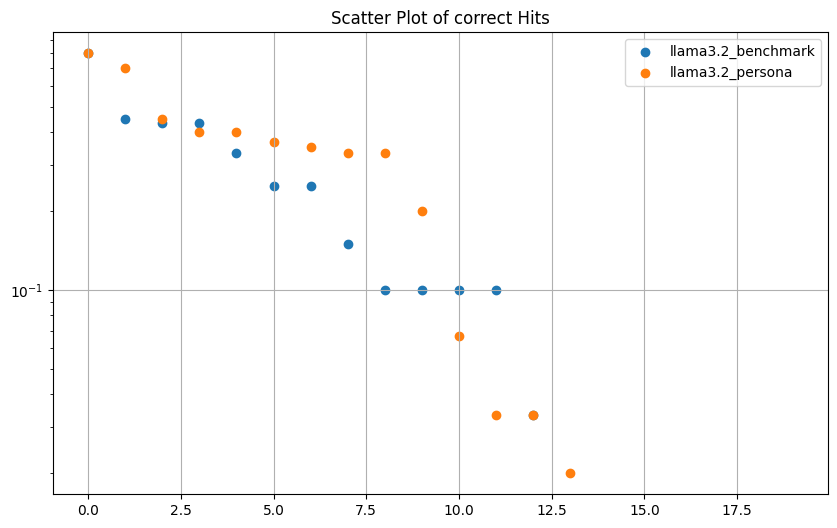

In [ ]:
import numpy as np
x = 2
#scatter plot c_all_fit_hits by descending order of value
benchmark = ind_df[ind_df["model"] == ind_df["model"].unique()[x]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
benchmark['index'] = np.arange(len(benchmark))

persona = ind_df[ind_df["model"] == ind_df["model"].unique()[x + 1]].sort_values(by="c_all_fit_hits", ascending=False).reset_index(drop=True)
persona['index'] = np.arange(len(persona))

plt.figure(figsize=(10, 6))
plt.scatter(x=benchmark["index"], y=benchmark["c_all_fit_hits"], label=ind_df["model"].unique()[x])
plt.scatter(x=persona["index"], y=persona["c_all_fit_hits"], label=ind_df["model"].unique()[x + 1])

plt.yscale("log")
plt.legend()
plt.title("Scatter Plot of correct Hits")
plt.grid(True)
plt.show()

# use the above ocde as reference to plot pairplot of c_ and r_hit rates


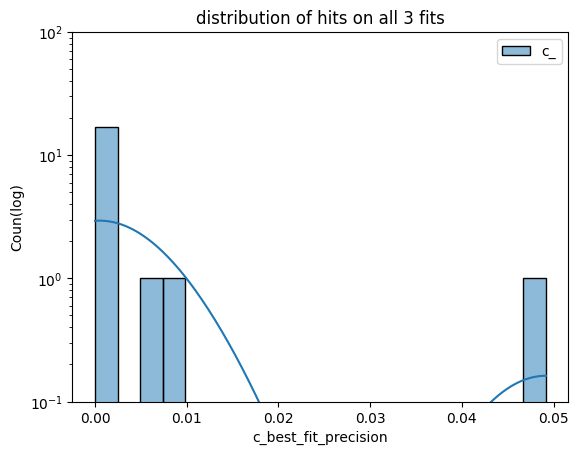

In [ ]:
# let see the distribution of the best_fit precsion, best and great fit precision, and all fit precision
import matplotlib.pyplot as plt
import seaborn as sns

x = 5
benchmark = ind_df[ind_df["model"] == ind_df["model"].unique()[x]]



#drop rows with all fit precision = 0
sns.histplot(data=benchmark["c_best_fit_precision"], bins=20, kde=True, label="c_")
# sns.histplot(data=benchmark["c_best_and_great_fit_precision"], bins=20, kde=True, label="best_and_great_fit_precision")
# sns.histplot(data=benchmark["c_all_fit_precision"], bins=20, kde=True, label="all_fc_it_precision")
#find ylabel range from 0-18

plt.yscale('log')
plt.ylim(0.1, 100)
plt.ylabel("Coun(log)")
plt.legend()
plt.title("distribution of hits on all 3 fits")
plt.show()


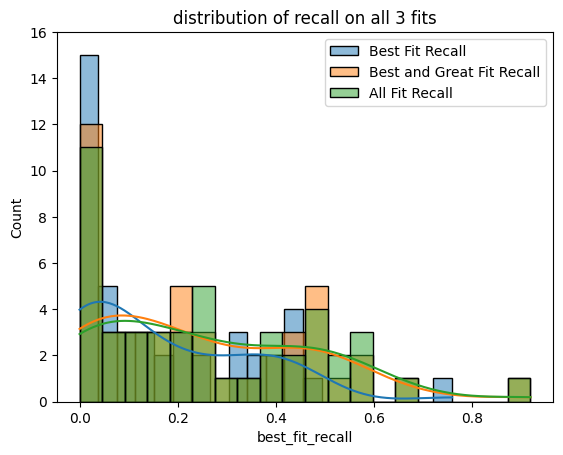

In [ ]:
#drop rows with all fit precision = 0
sns.histplot(data=check["best_fit_recall"], bins=20, kde=True, label="Best Fit Recall")
sns.histplot(data=check["best_and_great_fit_recall"], bins=20, kde=True, label="Best and Great Fit Recall")
sns.histplot(data=check["all_fit_recall"], bins=20, kde=True, label="All Fit Recall")
#find ylabel range from 0-18
plt.ylim(0, 16)
plt.ylabel("Count")
plt.legend()
plt.title("distribution of recall on all 3 fits")
plt.show()
